In [7]:
import pandas as pd
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
output_notebook()

Loading BokehJS ...

# Setting up Information about the Datasets

In [573]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [574]:
print(sns.color_palette('colorblind'))

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549), (0.00784313725490196, 0.6196078431372549, 0.45098039215686275), (0.8352941176470589, 0.3686274509803922, 0.0), (0.8, 0.47058823529411764, 0.7372549019607844), (0.792156862745098, 0.5686274509803921, 0.3803921568627451), (0.984313725490196, 0.6862745098039216, 0.8941176470588236), (0.5803921568627451, 0.5803921568627451, 0.5803921568627451), (0.9254901960784314, 0.8823529411764706, 0.2), (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]


In [575]:
experiment_types = {
    0: 'Sparse Cut',
    1: 'Low Conductance Cut',
    2: 'Normalized Cut',
    3: 'Greedy',
    4: 'DP',
}

algo_names = {
    'metis': 'METIS',
    'kahip': 'KaHiP',
    'graclus': 'Graclus',
    'greedy': 'XCut'
}

algo_colors = {
    'METIS': (0.8352941176470589, 0.3686274509803922, 0.0),
    'KaHiP': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
    'Graclus': (0.8, 0.47058823529411764, 0.7372549019607844),
    'XCut (mean)': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
    'XCut': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
    'XCut (min)': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
}

In [563]:
bipartite = 'Bipartite'
census = 'US Census Redistricting'
circuit = 'Circuit Simulation'
cluster = 'Clustering'
cit = 'Citation Network'
email = 'Email Network'
fe = 'Finite Elements'
fluids = 'Computational Fluids'
inf = 'Infrastructure Network'
materials = 'Duplicate Materials'
num = 'Numerical Simulation'
optimization = 'Optimization'
random = 'Random Graph'
road = 'Road Network'
soc = 'Social Network'
vsp = 'Triangle Mixture'
web = 'Web Graph'

graph_type_classes = [ bipartite, census, circuit, cluster, cit, email, 
                      fe, fluids, inf, materials, num, optimization, random,
                      road, soc, vsp, web ]

graph_type_shorthand = {
    cit: 'CN',
    soc: 'SN',
    vsp: 'TM',
    road: 'RN',
    circuit: 'CS',
    web: 'WB',
    inf: 'IF',
    optimization: 'OP',
    email: 'EM',
    num: 'NS',
    cluster: 'CL',
    fe: 'FE',
    fluids: 'CF',
    materials: 'DM',
    bipartite: 'BP',
    random: 'RD',
    census: 'US',
}

graph_type = {
    'add32': circuit,
    'finance256': optimization,
    'ramage02': fluids,
    'rajat10': circuit,
    'pcrystk02': materials,
    'gupta2': optimization,
    'imdb': bipartite,
    'memplus': circuit,
    'ca-coauthors-dblp': cit, 
#    'soc-catster': soc, # not connected
#    'petster-cat-friend': soc, # not connected
#    'cit-patent': cit, # not connected
    'ca-dblp-2012': cit,
    'web-google': web,
    'web-it-2004': web,
    'soc-lastfm': soc,
    'ca-dblp-2010': cit,
    'email-EU': email,
#    'soc-flickr-und': soc, # not connected
    'soc-twitter-follows': soc,
    'soc-pokec': soc,
    'soc-flickr': soc, 
    'inf-power': inf,
    'ca-citeseer': cit,
    'inf-openflights': inf,
    'inf-roadNet-CA': road,
    'ca-MathSciNet': cit,
    'email-enron-large': email,
    'soc-youtube-snap': soc,
    'inf-roadNet-PA': road, 
    'ca-hollywood-2009': cit,
    'soc-FourSquare': soc,
    'inf-italy-osm': road, 
    'soc-livejournal': soc, 
    'vsp_barth5_1Ksep_50in_5Kout': vsp,
    'vsp_bump2_e18_aa01_model1_crew1': vsp,
    'vsp_vibrobox_scagr7-2c_rlfddd': vsp,
    'appu': random, 
    'vsp_bcsstk30_500sep_10in_1Kout': vsp,
    'vsp_p0291_seymourl_iiasa': vsp,
#    'coAuthorsCiteseer': cit, # duplicate with ca-citeseer
#    'coPapersDBLP': cit, # duplicate with ca-coauthors-dpbl
    'vsp_model1_crew1_cr42_south31': vsp,
    'coPapersCiteseer': cit, 
    'luxembourg_osm': road, 
    'vsp_befref_fxm_2_4_air02': vsp,
    'citationCiteseer': cit, 
    'wing_nodal': num, 
    'uk': cluster, 
    'mi2010': census, 
    'smallworld': cluster,
    'fe_tooth': fe,
    'auto': num, 
    'fe_rotor': fe, 
    'coAuthorsDBLP': cit,
    'web-wikipedia2009': web,  
}

graclus_graphs = [ 'add32',
                  'finance256',
                  'gupta2',
                  'memplus',
                  'pcrystk02',
                  'rajat10',
                  'ramage02'
                 ]

graph_names = list(graph_type.keys())

In [140]:
# count the number of times a graph appears

from collections import Counter


type_counter = Counter(graph_type.values())

print(sum(type_counter.values()))

type_counter

50


Counter({'Citation Network': 9,
         'Social Network': 7,
         'Triangle Mixture': 7,
         'Road Network': 4,
         'Circuit Simulation': 3,
         'Web Graph': 3,
         'Optimization': 2,
         'Email Network': 2,
         'Infrastructure Network': 2,
         'Numerical Simulation': 2,
         'Clustering': 2,
         'Finite Elements': 2,
         'Computational Fluids': 1,
         'Duplicate Materials': 1,
         'Bipartite': 1,
         'Random Graph': 1,
         'US Census Redistricting': 1})

In [11]:
good_types = [
    bipartite,
    cit,
    soc,
    email,
    web,
    inf,
]
bad_types = [i for i in graph_type_classes if i not in good_types ]
bad_types

['US Census Redistricting',
 'Circuit Simulation',
 'Clustering',
 'Finite Elements',
 'Computational Fluids',
 'Duplicate Materials',
 'Numerical Simulation',
 'Optimization',
 'Random Graph',
 'Road Network',
 'Triangle Mixture']

In [695]:
keys = list(graph_type.keys())
values = list(graph_type.values())
sorted_value_index = np.argsort(values)

graph_order = [keys[i] for i in sorted_value_index]

instance_keys = {}
ct = graph_type[graph_order[0]]
cc = 1
for g in graph_order:
    g_type = graph_type[g]
    
    if ct != g_type:
        ct = g_type
        cc = 1

    instance_keys[g] = graph_type_shorthand[g_type] + str(cc)
    cc = cc + 1

print(instance_keys)

instance_keys['coAuthorsCiteseer'] = instance_keys['ca-citeseer']

graph_number = {keys[sorted_value_index[i]]: i for i in range(len(sorted_value_index))}

graph_number['coAuthorsCiteseer'] = graph_number['ca-citeseer']
graph_number


{'imdb': 'BP1', 'add32': 'CS1', 'rajat10': 'CS2', 'memplus': 'CS3', 'citationCiteseer': 'CN1', 'ca-hollywood-2009': 'CN2', 'coAuthorsDBLP': 'CN3', 'ca-MathSciNet': 'CN4', 'ca-coauthors-dblp': 'CN5', 'ca-dblp-2012': 'CN6', 'ca-citeseer': 'CN7', 'coPapersCiteseer': 'CN8', 'ca-dblp-2010': 'CN9', 'uk': 'CL1', 'smallworld': 'CL2', 'ramage02': 'CF1', 'pcrystk02': 'DM1', 'email-enron-large': 'EM1', 'email-EU': 'EM2', 'fe_tooth': 'FE1', 'fe_rotor': 'FE2', 'inf-openflights': 'IF1', 'inf-power': 'IF2', 'wing_nodal': 'NS1', 'auto': 'NS2', 'gupta2': 'OP1', 'finance256': 'OP2', 'appu': 'RD1', 'inf-roadNet-CA': 'RN1', 'inf-roadNet-PA': 'RN2', 'inf-italy-osm': 'RN3', 'luxembourg_osm': 'RN4', 'soc-youtube-snap': 'SN1', 'soc-flickr': 'SN2', 'soc-lastfm': 'SN3', 'soc-twitter-follows': 'SN4', 'soc-pokec': 'SN5', 'soc-livejournal': 'SN6', 'soc-FourSquare': 'SN7', 'vsp_vibrobox_scagr7-2c_rlfddd': 'TM1', 'vsp_bump2_e18_aa01_model1_crew1': 'TM2', 'vsp_barth5_1Ksep_50in_5Kout': 'TM3', 'vsp_model1_crew1_cr42_s

{'imdb': 0,
 'add32': 1,
 'rajat10': 2,
 'memplus': 3,
 'citationCiteseer': 4,
 'ca-hollywood-2009': 5,
 'coAuthorsDBLP': 6,
 'ca-MathSciNet': 7,
 'ca-coauthors-dblp': 8,
 'ca-dblp-2012': 9,
 'ca-citeseer': 10,
 'coPapersCiteseer': 11,
 'ca-dblp-2010': 12,
 'uk': 13,
 'smallworld': 14,
 'ramage02': 15,
 'pcrystk02': 16,
 'email-enron-large': 17,
 'email-EU': 18,
 'fe_tooth': 19,
 'fe_rotor': 20,
 'inf-openflights': 21,
 'inf-power': 22,
 'wing_nodal': 23,
 'auto': 24,
 'gupta2': 25,
 'finance256': 26,
 'appu': 27,
 'inf-roadNet-CA': 28,
 'inf-roadNet-PA': 29,
 'inf-italy-osm': 30,
 'luxembourg_osm': 31,
 'soc-youtube-snap': 32,
 'soc-flickr': 33,
 'soc-lastfm': 34,
 'soc-twitter-follows': 35,
 'soc-pokec': 36,
 'soc-livejournal': 37,
 'soc-FourSquare': 38,
 'vsp_vibrobox_scagr7-2c_rlfddd': 39,
 'vsp_bump2_e18_aa01_model1_crew1': 40,
 'vsp_barth5_1Ksep_50in_5Kout': 41,
 'vsp_model1_crew1_cr42_south31': 42,
 'vsp_p0291_seymourl_iiasa': 43,
 'vsp_bcsstk30_500sep_10in_1Kout': 44,
 'vsp_bef

In [739]:
def read_hierarchy_experiments(filename):
    df_hierarchy = pd.read_csv(filename, 
                 sep = ',', 
                 header = 0, 
                 names = ['Graph Name', 
                          'Experiment Type', 
                          'Phi', 
                          'Potential', 
                          'Parts',
                          'Time (decomp)',
                          'Time (solve)', 
                          'Value (mid)',
                          'Value'], 
                 dtype = {
                     'Graph Name': str,
                     'Experiment Type': int,
                     'Phi': float,
                     'Potential': float,
                     'Parts': int,
                     'Time (decomp)': float,
                     'Time (solve)': float,
                     'Value (mid)': float,
                     'Value': float,
                 },
                )

    # make into seconds
    df_hierarchy['Time (decomp)'] /= 1000.0
    df_hierarchy['Time (solve)'] /= 1000.0 
    
    df_hierarchy['Experiment Type'] = df_hierarchy['Experiment Type'].map(experiment_types)
    df_hierarchy['Time'] = (df_hierarchy['Time (decomp)'] + df_hierarchy['Time (solve)'])
    df_hierarchy['Algorithm Name'] = 'XCut'
    # df_hierarchy['Experiment Type'] + '-' + df_hierarchy['Phi'].astype(str)
    #df_hierarchy['Type'] = df_hierarchy['Graph Name'].map(graph_type)
    #df_hierarchy['Graph Number'] = df_hierarchy['Graph Name'].map(graph_number)

    return df_hierarchy

In [740]:
def read_comparison_experiments(filename):
    df_comparison = pd.read_csv(filename, 
                           sep=',',
                           header=0,
                           names = ['Graph Name',
                                    'Experiment Type',
                                    'Parts',
                                    'Time',
                                    'Value',
                                   ],
                            dtype = {
                                'Graph Name': str,
                                'Experiment Type': str,
                                'Parts': int,
                                'Time': float,
                                'Value': float,
                            }
                           )

    df_comparison['Algorithm Name'] = df_comparison['Experiment Type'].map(algo_names)
    #df_comparison['Type'] = df_comparison['Graph Name'].map(graph_type)
    #df_comparison['Graph Number'] = df_comparison['Graph Name'].map(graph_number)


    return df_comparison

In [536]:
def read_experiments(comparison_filename, hierarchy_filename):
    df_comparison = pd.DataFrame()
    df_hierarchy = pd.DataFrame()
    
    if comparison_filename is not None:
        df_comparison = read_comparison_experiments(comparison_filename)

    if hierarchy_filename is not None:
        df_hierarchy = read_hierarchy_experiments(hierarchy_filename)

    if (comparison_filename is not None) and (hierarchy_filename is not None):
        df = pd.merge(left=df_hierarchy, right=df_comparison, how = 'outer')
    elif comparison_filename is not None:
        df = df_comparison
    elif hierarchy_filename is not None:
        df = df_hierarchy

    df = df[df['Graph Name'].isin(graph_names)]

    df['Type'] = df['Graph Name'].map(graph_type)
    df['Type (short)'] = df['Type'].map(graph_type_shorthand)
    df['Graph ID'] = df['Graph Name'].map(instance_keys)

    return df.sort_values('Graph ID')

In [537]:
def geo_mean(iterable):
    a = np.array(iterable)
    return a.prod()**(1.0/len(a))

def geo_mean_overflow(iterable):
    return np.exp(np.log(iterable).mean())

# Load the datasets

In [641]:
df = read_experiments('./data/comparison-experiments-31-jan.csv', './data/hierarchy-experiments-autotune-30-jan.csv')

In [642]:
df['Graph Name'].unique()

array(['imdb', 'ramage02', 'uk', 'smallworld', 'citationCiteseer',
       'ca-hollywood-2009', 'coAuthorsDBLP', 'ca-MathSciNet',
       'ca-coauthors-dblp', 'ca-dblp-2012', 'ca-citeseer',
       'coPapersCiteseer', 'ca-dblp-2010', 'add32', 'rajat10', 'memplus',
       'pcrystk02', 'email-enron-large', 'email-EU', 'fe_tooth',
       'fe_rotor', 'inf-openflights', 'inf-power', 'wing_nodal', 'auto',
       'gupta2', 'finance256', 'appu', 'inf-roadNet-CA', 'inf-roadNet-PA',
       'inf-italy-osm', 'luxembourg_osm', 'soc-youtube-snap',
       'soc-flickr', 'soc-lastfm', 'soc-twitter-follows', 'soc-pokec',
       'soc-livejournal', 'soc-FourSquare',
       'vsp_vibrobox_scagr7-2c_rlfddd', 'vsp_bump2_e18_aa01_model1_crew1',
       'vsp_barth5_1Ksep_50in_5Kout', 'vsp_model1_crew1_cr42_south31',
       'vsp_p0291_seymourl_iiasa', 'vsp_bcsstk30_500sep_10in_1Kout',
       'vsp_befref_fxm_2_4_air02', 'mi2010', 'web-it-2004', 'web-google',
       'web-wikipedia2009'], dtype=object)

In [643]:
df['Relative (Graclus)'] = df['Value']

# Chosen name
chosen_name = 'Graclus'

# Filter rows with the chosen name
chosen_rows = df[df['Algorithm Name'] == chosen_name]

# Check if the chosen rows exist
if not chosen_rows.empty:
    # Iterate over the chosen rows and divide each row of the DataFrame
    for _, chosen_row in chosen_rows.iterrows():
        chosen_number = chosen_row['Parts']
        chosen_name = chosen_row['Graph Name']
        chosen_value = chosen_row['Value']

        # Divide each row by the chosen row with the same number
        df.loc[(df['Parts'] == chosen_number) & (df['Graph Name'] == chosen_name), 'Relative (Graclus)'] /= chosen_value

    #print(df)
else:
    print("No rows found with the chosen name.")

In [637]:
df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
458                imdb          greedy  0.0     0.0001     16         72.046   
437                imdb          greedy  0.0     0.0001     16         61.855   
436                imdb          greedy  0.0     0.0001      8         61.855   
435                imdb          greedy  0.0     0.0001      4         61.855   
434                imdb          greedy  0.0     0.0001      2         61.855   
...                 ...             ...  ...        ...    ...            ...   
1838  web-wikipedia2009          greedy  0.0     0.0001     32         82.414   
1839  web-wikipedia2009          greedy  0.0     0.0001     64         82.414   
1840  web-wikipedia2009          greedy  0.0     0.0001    128         82.414   
1814  web-wikipedia2009          greedy  0.0     0.0001      4         80.866   
3932  web-wikipedia2009           kahip  NaN        NaN    128            NaN   

      Time (solve)  Value (mid)      Value      Time Algorithm Name  \
458          3.003     0.000000   0.000000   75.0490           XCut   
437          2.858     0.000000   0.000000   64.7130           XCut   
436          1.389     0.000000   0.000000   63.2440           XCut   
435          0.789     0.000000   0.000000   62.6440           XCut   
434          0.562     0.000000   0.000000   62.4170           XCut   
...            ...          ...        ...       ...            ...   
1838         9.133     0.096629   0.096117   91.5470           XCut   
1839        18.020     0.294659   0.283299  100.4340           XCut   
1840        36.698     0.868945   0.852063  119.1120           XCut   
1814         1.559     0.002961   0.002960   82.4250           XCut   
3932           NaN          NaN  20.891500   17.5217          KaHiP   

           Type Type (short) Graph ID  Relative (Graclus)  
458   Bipartite           BP      BP1            0.000000  
437   Bipartite           BP      BP1            0.000000  
436   Bipartite           BP      BP1            0.000000  
435   Bipartite           BP      BP1            0.000000  
434   Bipartite           BP      BP1            0.000000  
...         ...          ...      ...                 ...  
1838  Web Graph           WB      WB3            0.030182  
1839  Web Graph           WB      WB3            0.038600  
1840  Web Graph           WB      WB3            0.053940  
1814  Web Graph           WB      WB3            0.012437  
3932  Web Graph           WB      WB3            1.322531  

[4522 rows x 15 columns]

# Lineplots of Normalized Cut Value and Time

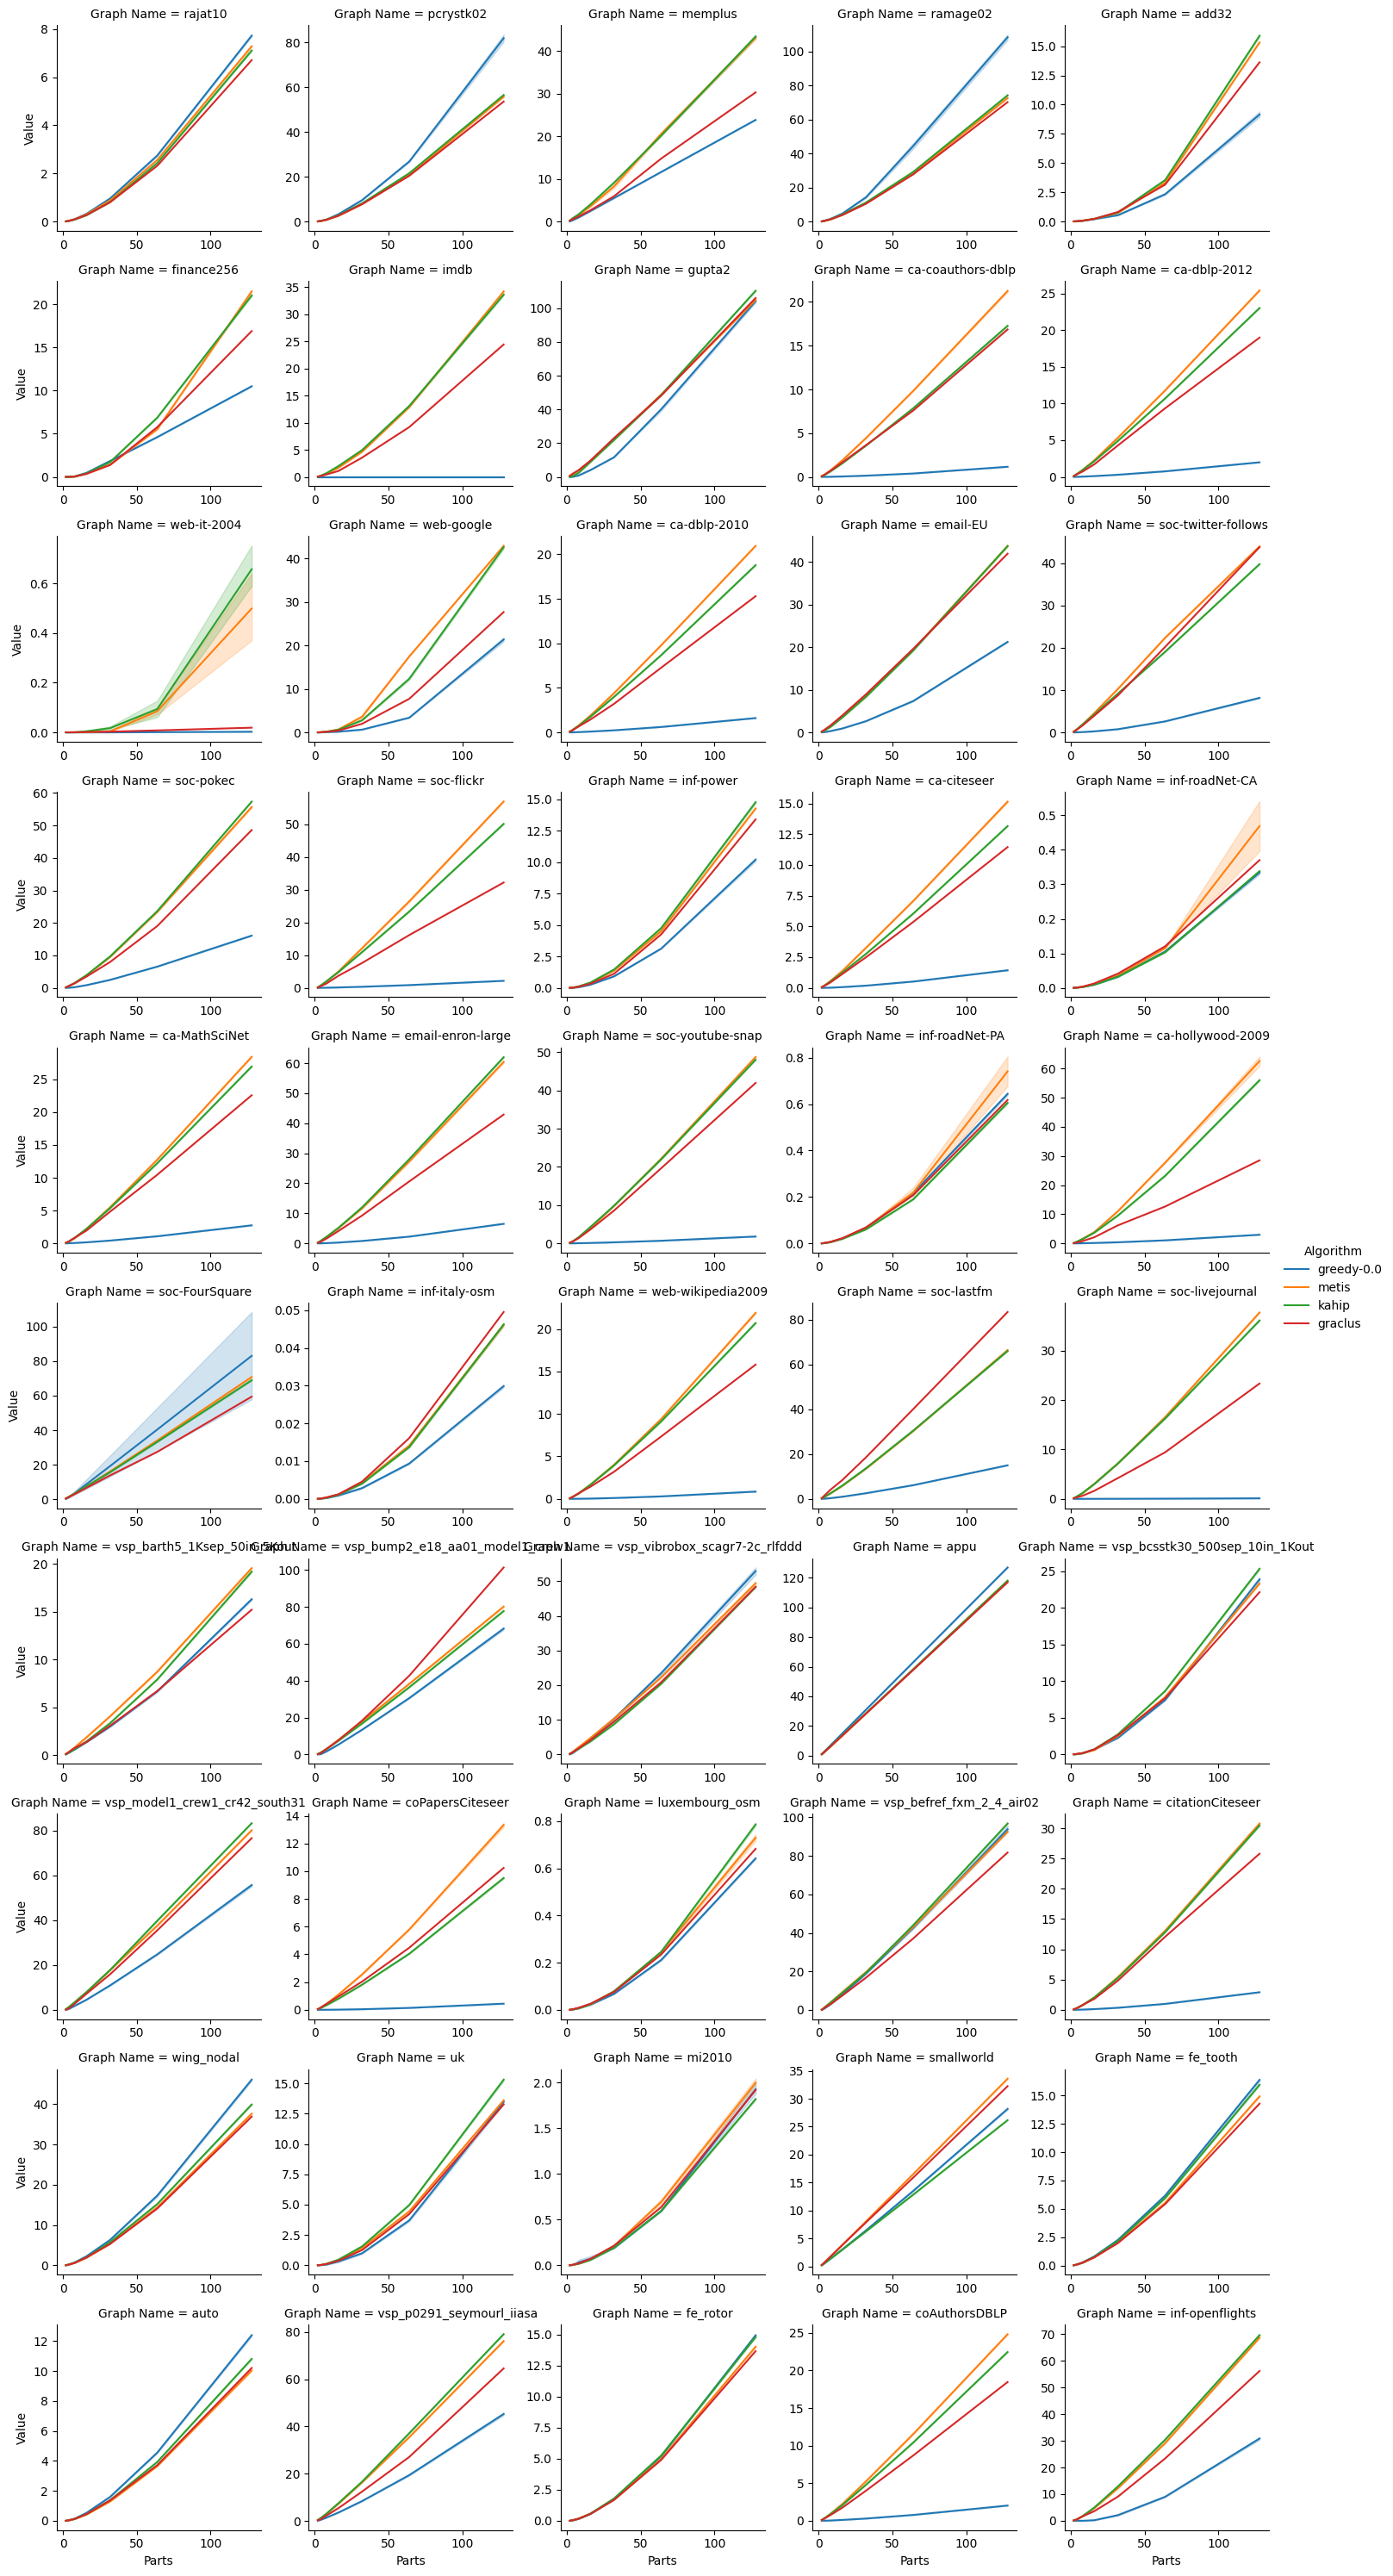

In [1170]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=5)
g.map(sns.lineplot, 'Parts', 'Value')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("full-quality.pdf") 
g

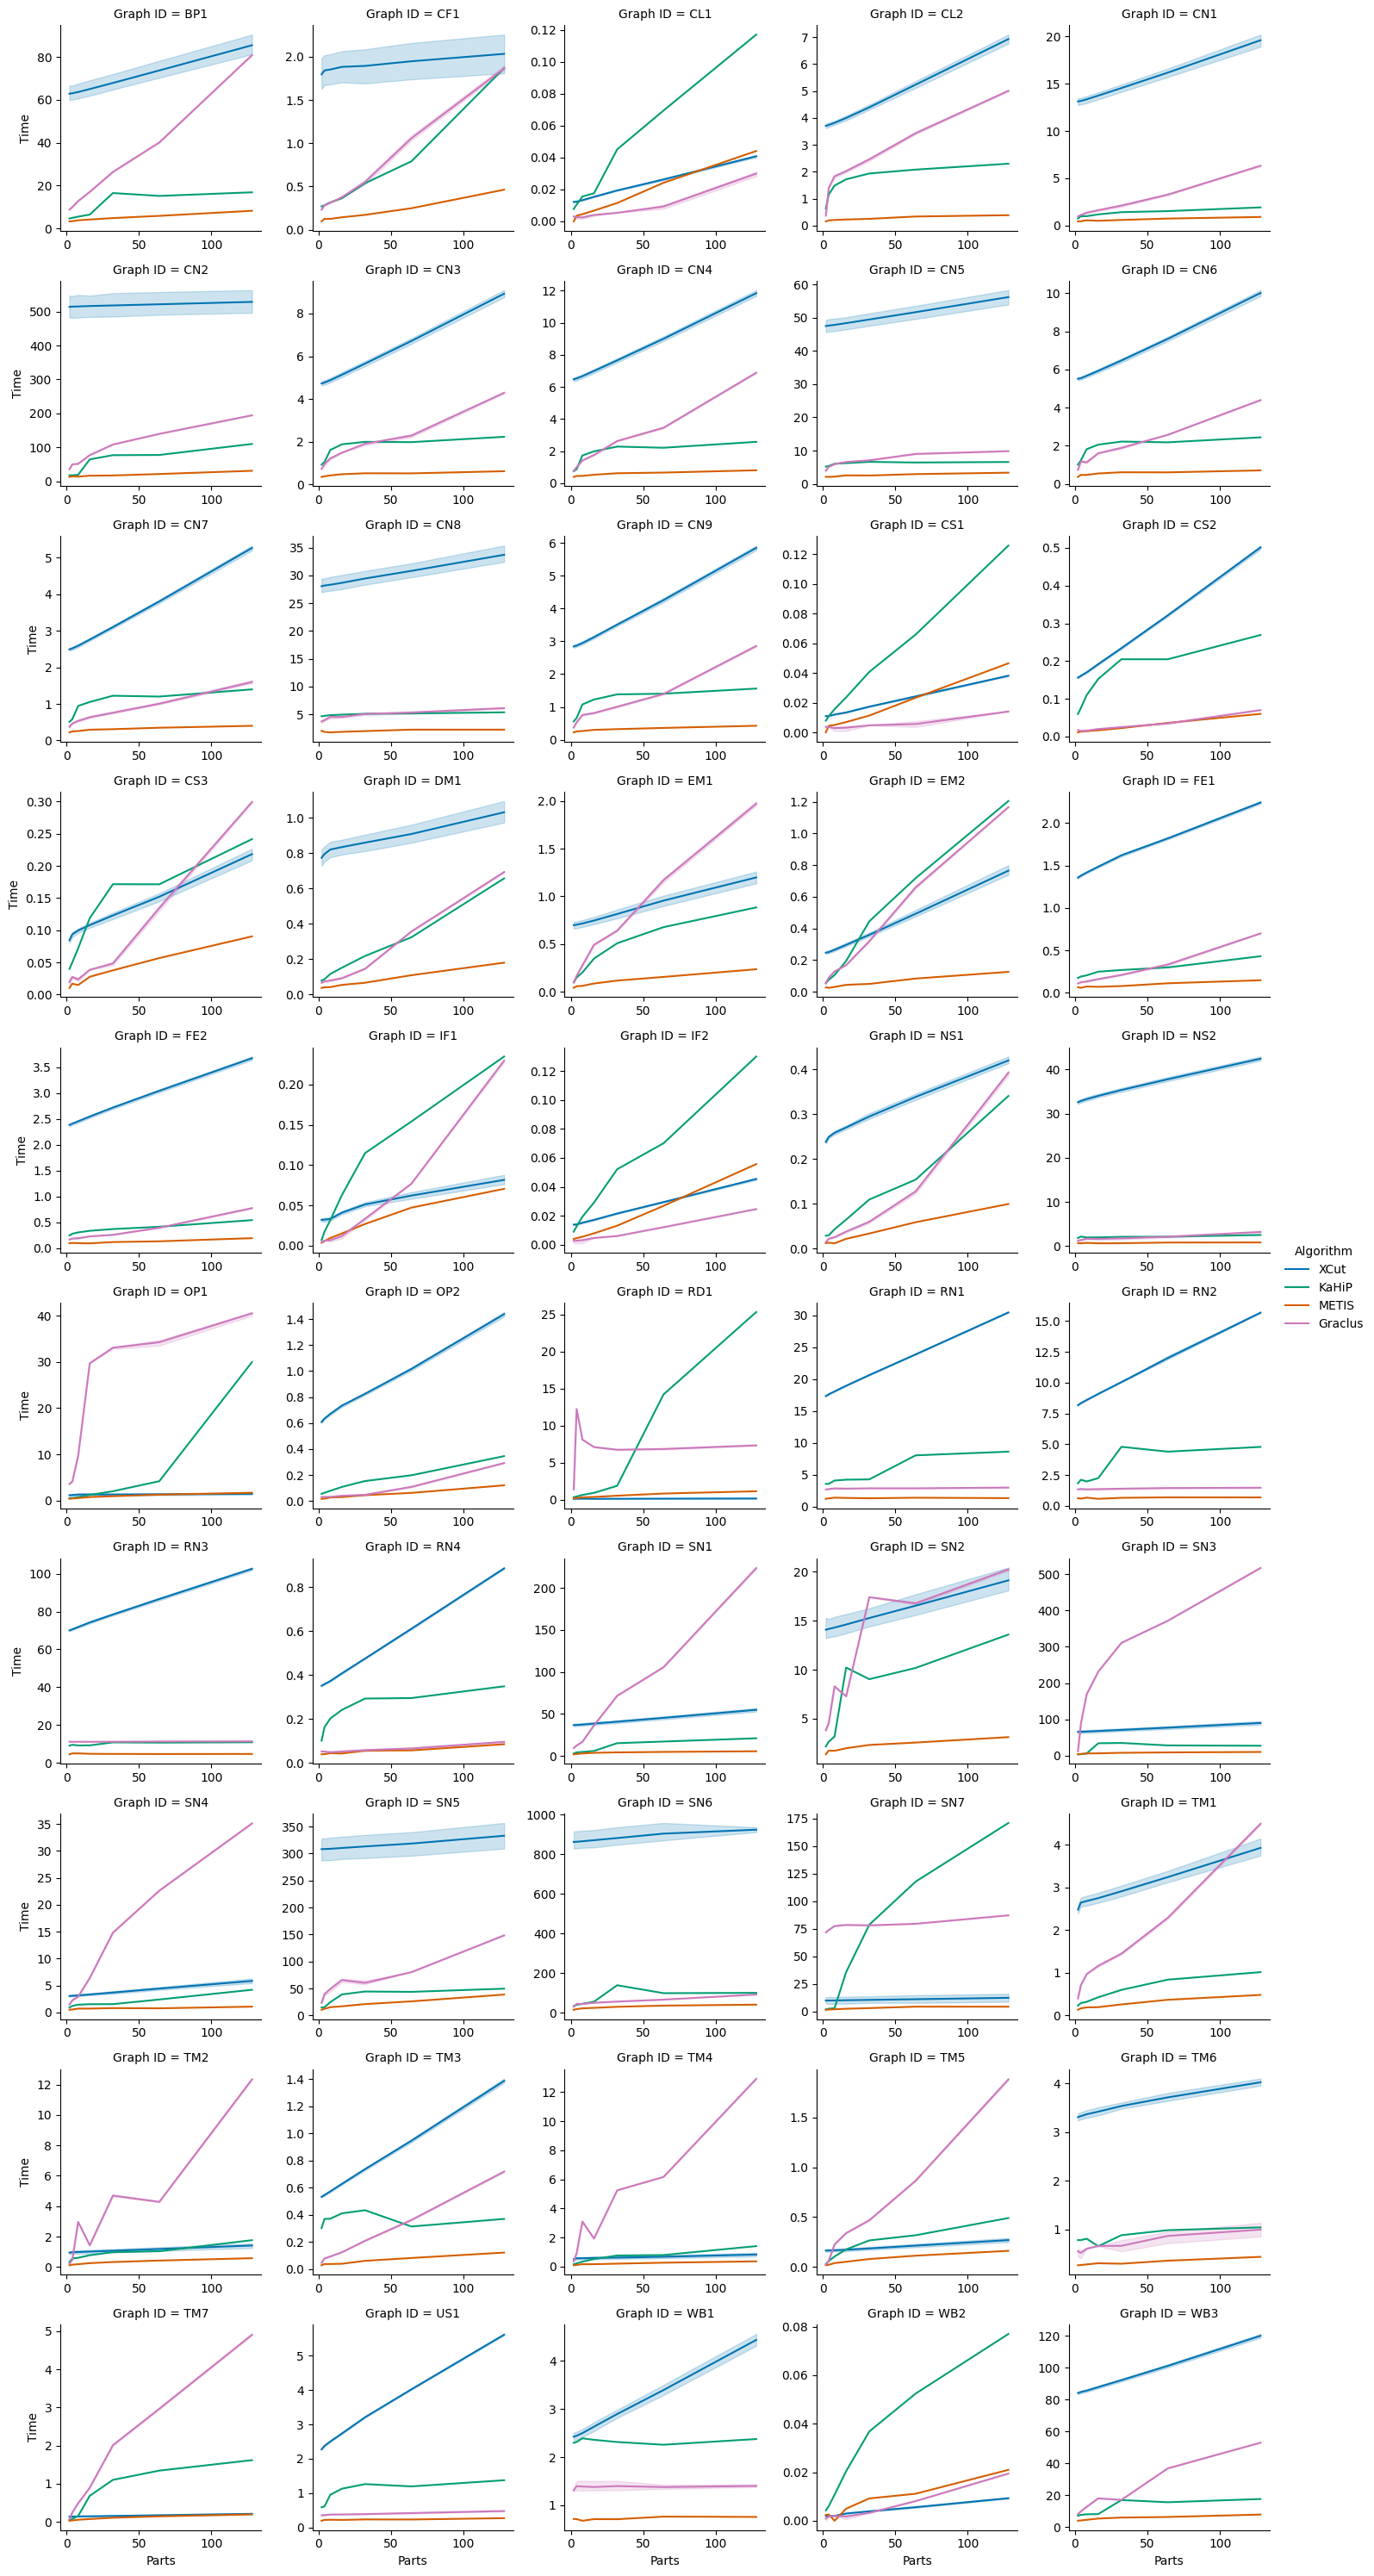

In [607]:
g = sns.FacetGrid(df, col = 'Graph ID', hue='Algorithm Name', palette=algo_colors, sharey = False, sharex = False, col_wrap=5)
g.map(sns.lineplot, 'Parts', 'Time')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("full-time.pdf") 
g

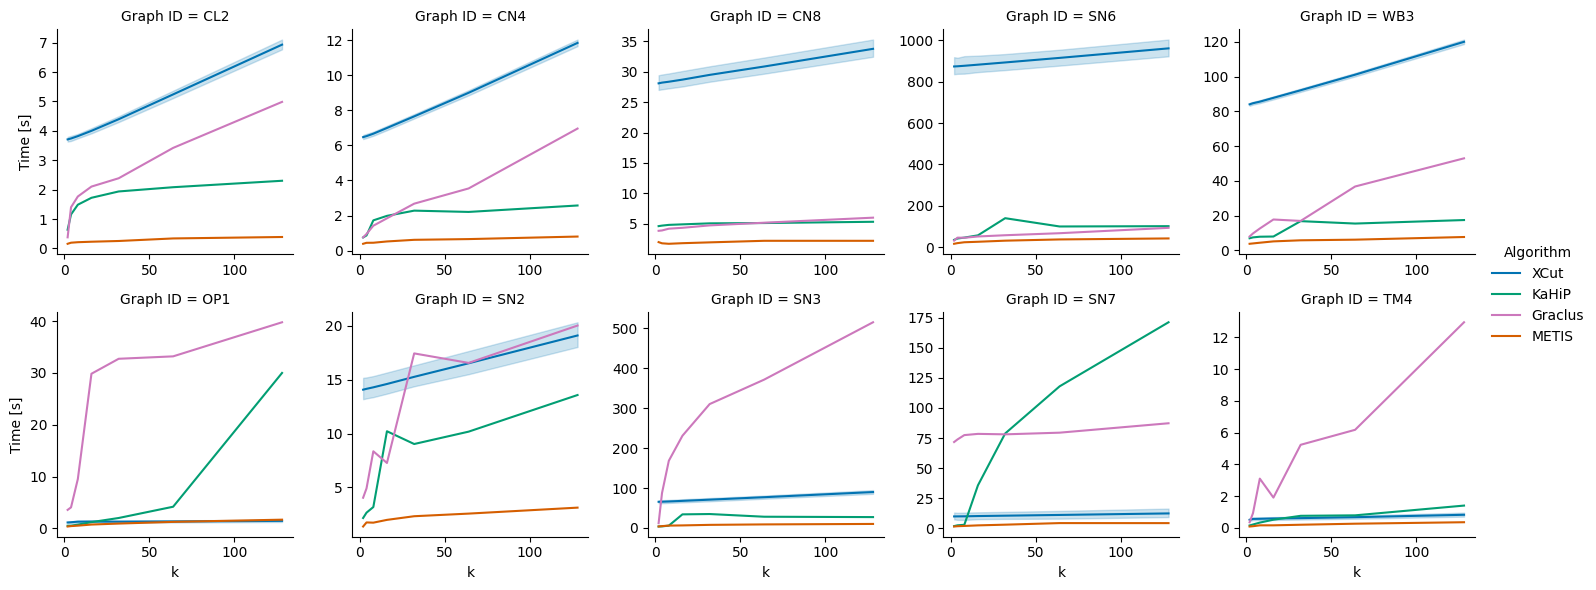

In [640]:
selected = ['CL2', 'CN4', 'CN8', 'SN6', 'WB3',
            'OP1', 'SN2', 'SN3', 'SN7', 'TM4' ]

g = sns.FacetGrid(df[df['Graph ID'].isin(selected)], col = 'Graph ID', hue='Algorithm Name', col_order = selected, palette=algo_colors, sharey = False, sharex = False, col_wrap=5)
g.map(sns.lineplot, 'Parts', 'Time')
g.add_legend(title='Algorithm')

for i in range(5, 10):
    g.axes[i].set_xlabel('k')

g.axes[0].set_ylabel('Time [s]')
g.axes[5].set_ylabel('Time [s]')

fig = g.fig
fig.savefig("partial-time.pdf") 

In [177]:
df['Time Relative (Graclus)'] = df['Time']

# Chosen name
chosen_name = 'graclus'

# Filter rows with the chosen name
chosen_rows = df[df['Algorithm Name'] == chosen_name]

# Check if the chosen rows exist
if not chosen_rows.empty:
    # Iterate over the chosen rows and divide each row of the DataFrame
    for _, chosen_row in chosen_rows.iterrows():
        chosen_number = chosen_row['Parts']
        chosen_name = chosen_row['Graph Name']
        chosen_value = chosen_row['Time']

        # Divide each row by the chosen row with the same number
        df.loc[(df['Parts'] == chosen_number) & (df['Graph Name'] == chosen_name), 'Time Relative (Graclus)'] /= chosen_value

    #print(df)
else:
    print("No rows found with the chosen name.")

df

No rows found with the chosen name.


Graph Name Experiment Type  Phi  Potential  Parts  \
10490               imdb           metis  NaN        NaN      2   
10505               imdb           metis  NaN        NaN      4   
10504               imdb           metis  NaN        NaN      4   
10503               imdb         graclus  NaN        NaN      2   
10502               imdb           kahip  NaN        NaN      2   
...                  ...             ...  ...        ...    ...   
9166   web-wikipedia2009           metis  NaN        NaN      2   
9167   web-wikipedia2009           metis  NaN        NaN      2   
9168   web-wikipedia2009           metis  NaN        NaN      2   
1839   web-wikipedia2009          greedy  0.0     0.0001      2   
9305   web-wikipedia2009           kahip  NaN        NaN    128   

       Time (decomp)  Time (solve)  Value (mid)      Value      Time  \
10490            NaN           NaN          NaN   0.028530   3.69030   
10505            NaN           NaN          NaN   0.171621   4.06318   
10504            NaN           NaN          NaN   0.168228   4.11926   
10503            NaN           NaN          NaN   0.045732   8.68729   
10502            NaN           NaN          NaN   0.037541   5.59666   
...              ...           ...          ...        ...       ...   
9166             NaN           NaN          NaN   0.061646   3.79458   
9167             NaN           NaN          NaN   0.061454   3.76291   
9168             NaN           NaN          NaN   0.064755   3.76218   
1839          83.976         0.842     0.000467   0.000467  84.81800   
9305             NaN           NaN          NaN  20.824300  16.15970   

      Algorithm Name       Type Graph Number  Relative (Graclus)  \
10490          METIS  Bipartite          BP1            0.623840   
10505          METIS  Bipartite          BP1            0.982044   
10504          METIS  Bipartite          BP1            0.962629   
10503        Graclus  Bipartite          BP1            1.000000   
10502          KaHiP  Bipartite          BP1            0.820895   
...              ...        ...          ...                 ...   
9166           METIS  Web Graph          WB3            0.834760   
9167           METIS  Web Graph          WB3            0.832160   
9168           METIS  Web Graph          WB3            0.876864   
1839            XCut  Web Graph          WB3            0.006328   
9305           KaHiP  Web Graph          WB3            1.318277   

       Time Relative (Graclus)  
10490                  3.69030  
10505                  4.06318  
10504                  4.11926  
10503                  8.68729  
10502                  5.59666  
...                        ...  
9166                   3.79458  
9167                   3.76291  
9168                   3.76218  
1839                  84.81800  
9305                  16.15970  

[10777 rows x 15 columns]

In [174]:
df.groupby(['Type', 'Algorithm Name'])[['Improvement (Graclus)', 'Time Relative (Graclus)']].mean().unstack()

KeyError: "Columns not found: 'Improvement (Graclus)'"

In [178]:
print(
    df[df['Algorithm Name'] != 'Graclus'].groupby(
        ['Type', 'Algorithm Name']
    )[['Relative (Graclus)']] #, 'Time Relative (Graclus)']]
        .mean().unstack().to_latex(
            index=True, 
            float_format='%.2f',
            caption='Statistics on the number of vertices, edges and degree distribution of the graph instances in our benchmark dataset. The last four columns are percentile values for the degrees.',
            label='tab:instances',
            escape=True
        )
)

\begin{table}
\caption{Statistics on the number of vertices, edges and degree distribution of the graph instances in our benchmark dataset. The last four columns are percentile values for the degrees.}
\label{tab:instances}
\begin{tabular}{lrrr}
\toprule
 & \multicolumn{3}{r}{Relative (Graclus)} \\
Algorithm Name & KaHiP & METIS & XCut \\
Type &  &  &  \\
\midrule
Bipartite & 1.38 & 1.22 & 0.00 \\
Circuit Simulation & 1.13 & 1.17 & 0.90 \\
Citation Network & 1.14 & 1.24 & 0.06 \\
Clustering & 1.00 & 1.09 & 0.78 \\
Computational Fluids & 1.05 & 1.02 & 1.35 \\
Duplicate Materials & 1.06 & 1.01 & 1.24 \\
Email Network & 1.15 & 1.13 & 0.17 \\
Finite Elements & 1.03 & 1.00 & 1.04 \\
Infrastructure Network & 1.21 & 1.21 & 0.48 \\
Numerical Simulation & 1.05 & 0.99 & 1.12 \\
Optimization & 0.91 & 1.01 & 0.80 \\
Random Graph & 1.01 & 0.99 & 1.11 \\
Road Network & 0.85 & 0.93 & 0.80 \\
Social Network & 1.27 & 1.24 & 0.25 \\
Triangle Mixture & 1.22 & 1.28 & 0.79 \\
US Census Redistricting & 0.88

In [48]:
df[(df['Algorithm Name'] == 'greedy-0.0') & (df['Value'] > 0)][['Relative (Graclus)', 'Time Relative (Graclus)']].mean()

Relative (Graclus)         0.569036
Time Relative (Graclus)    5.139701
dtype: float64

In [44]:
df[(df['Algorithm Name'] == 'greedy-0.0') & (df['Value'] > 0)][['Relative (Graclus)']].agg(geo_mean_overflow)

Relative (Graclus)    0.270004
dtype: float64

In [47]:
df[(df['Algorithm Name'] == 'greedy-0.0')][['Time Relative (Graclus)']].agg(geo_mean_overflow)

Time Relative (Graclus)    2.520932
dtype: float64

In [59]:
df[df['Value'] > 0].groupby(['Algorithm Name', 'Parts'])[['Value']].agg(geo_mean_overflow).unstack()

Value                                                    \
Parts                2         4         8         16        32        64    
Algorithm Name                                                               
graclus         0.030597  0.126719  0.379651  1.025285  2.678162  6.765093   
greedy-0.0      0.004988  0.026299  0.097629  0.303975  0.876838  2.523293   
kahip           0.027166  0.126617  0.389649  1.139615  3.041377  7.759192   
metis           0.031330  0.133368  0.404602  1.131773  3.069330  8.218424   

                           
Parts                 128  
Algorithm Name             
graclus         16.623073  
greedy-0.0       7.027187  
kahip           19.950203  
metis           20.686617

In [61]:
df[df['Time'] > 0].groupby(['Algorithm Name', 'Parts'])['Time'].agg(geo_mean_overflow).unstack()

Parts                2         4         8         16        32        64   \
Algorithm Name                                                               
graclus         0.393417  0.571860  0.736654  0.909786  1.215827  1.758606   
greedy-0.0      1.967056  2.000186  2.058920  2.172250  2.378672  2.736443   
kahip           0.421939  0.515677  0.666001  0.979663  1.368014  1.632524   
metis           0.183478  0.207927  0.242220  0.278577  0.344054  0.447180   

Parts                128  
Algorithm Name            
graclus         2.966353  
greedy-0.0      3.417483  
kahip           2.244298  
metis           0.597685

In [29]:
gmean1 = lambda x: x.product() ** (1 / float(len(x)))
df.groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)'].agg(gmean1).unstack()

Parts                                        2         4         8    \
Algorithm Name Type                                                    
graclus        Bipartite                1.000000  1.000000  1.000000   
               Circuit Simulation       1.000000  1.000000  1.000000   
               Citation Network         1.000000  1.000000  1.000000   
               Clustering               1.000000  1.000000  1.000000   
               Computational Fluids     1.000000  1.000000  1.000000   
...                                          ...       ...       ...   
metis          Road Network             0.858890  0.827971  0.837050   
               Social Network           1.152879  1.038366  1.143874   
               Triangle Mixture         1.154151  1.318762  1.127327   
               US Census Redistricting  0.935590  0.971985  0.922520   
               Web Graph                0.927970  0.791606  0.810459   

Parts                                        16        32        64        128  
Algorithm Name Type                                                             
graclus        Bipartite                1.000000  1.000000  1.000000  1.000000  
               Circuit Simulation       1.000000  1.000000  1.000000  1.000000  
               Citation Network         1.000000  1.000000  1.000000  1.000000  
               Clustering               1.000000  1.000000  1.000000  1.000000  
               Computational Fluids     1.000000  1.000000  1.000000  1.000000  
...                                          ...       ...       ...       ...  
metis          Road Network             0.898766  0.952465  0.977143  1.098309  
               Social Network           1.159813  1.206733  1.225445  1.202293  
               Triangle Mixture         1.142898  1.127765  1.107628  1.062474  
               US Census Redistricting  0.943923  0.988795  1.088060  1.041674  
               Web Graph                0.907254  1.426052  3.109738  3.725040  

[68 rows x 7 columns]

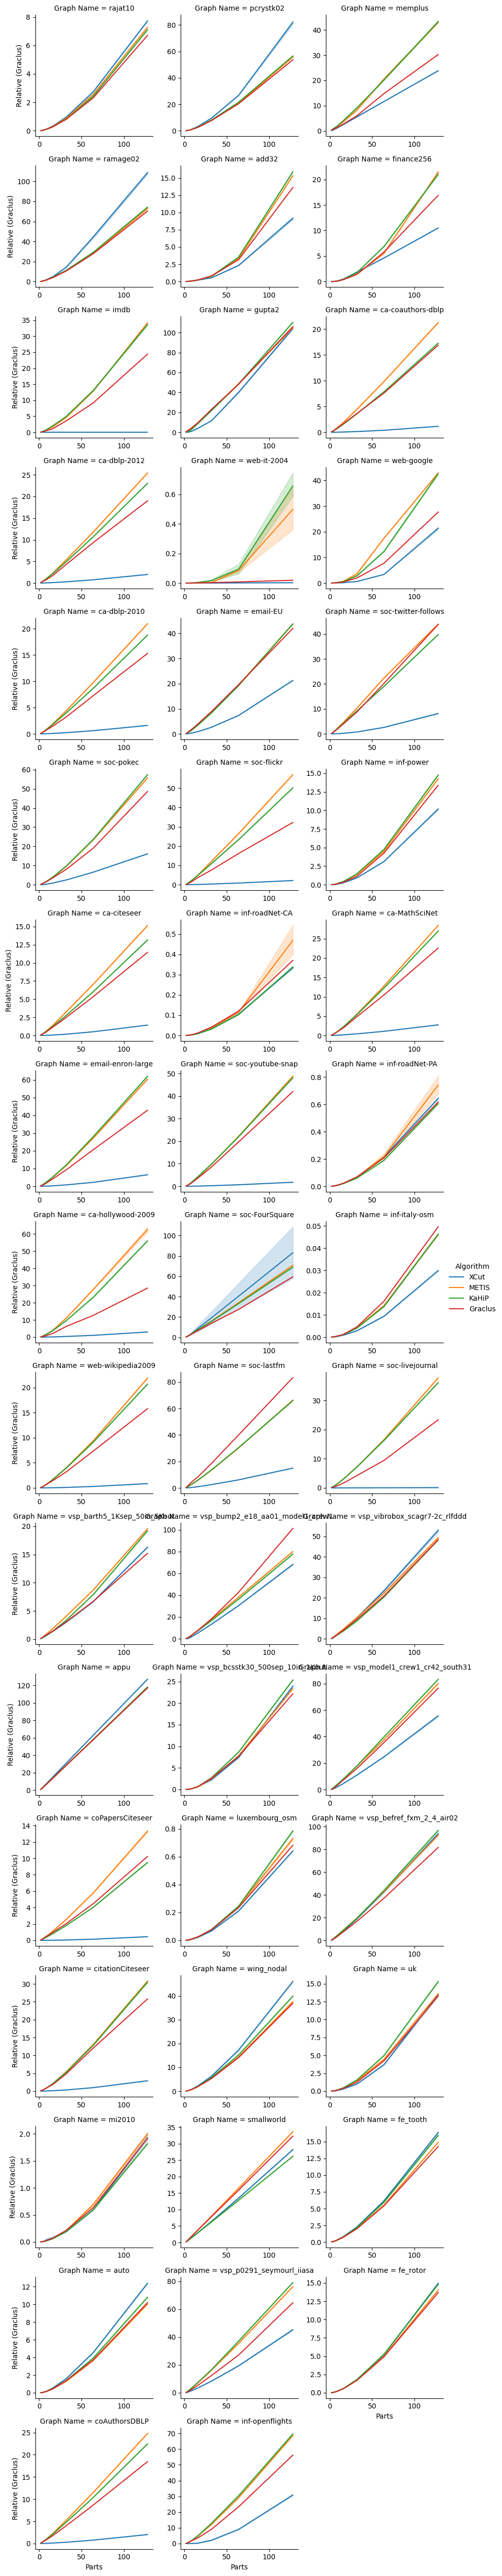

In [117]:
g = sns.FacetGrid(df, col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Parts', 'Relative (Graclus)')
g.add_legend(title='Algorithm')

# Barplot

In [163]:
print(
    df[df['Algorithm Name'] != 'graclus'].groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)']
    .mean().unstack().to_latex(
        float_format='%.2f',
        caption='Average relative value across graph types relative to Graclus over $k$.',
        label='tab:avgs'
    )
)

\begin{table}
\caption{Average relative value across graph types relative to Graclus over $k$.}
\label{tab:avgs}
\begin{tabular}{llrrrrrrr}
\toprule
 & Parts & 2 & 4 & 8 & 16 & 32 & 64 & 128 \\
Algorithm Name & Type &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{17}{*}{Graclus} & Bipartite & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Circuit Simulation & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Citation Network & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Clustering & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Computational Fluids & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Duplicate Materials & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Email Network & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Finite Elements & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Infrastructure Network & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 & Numerical Simulation & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
 

In [683]:
print(
    df.groupby(['Type', 'Algorithm Name', 'Parts'])['Value']
    .agg(geo_mean_overflow).unstack().to_latex(
        float_format='%.2f',
        caption='Geometric mean of normalized cut value across graph types over $k$.',
        label='tab:avgs'
    )
)

\begin{table}
\caption{Geometric mean of normalized cut value across graph types over $k$.}
\label{tab:avgs}
\begin{tabular}{llrrrrrrr}
\toprule
 & Parts & 2 & 4 & 8 & 16 & 32 & 64 & 128 \\
Type & Algorithm Name &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{Bipartite} & Graclus & 0.05 & 0.17 & 0.45 & 1.09 & 3.55 & 9.18 & 24.41 \\
 & KaHiP & 0.04 & 0.27 & 0.67 & 1.92 & 4.84 & 13.03 & 33.65 \\
 & METIS & 0.03 & 0.17 & 0.59 & 1.66 & 4.66 & 13.07 & 34.55 \\
 & XCut & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
\cline{1-9}
\multirow[t]{4}{*}{Circuit Simulation} & Graclus & 0.01 & 0.06 & 0.18 & 0.54 & 1.57 & 4.76 & 14.04 \\
 & KaHiP & 0.01 & 0.07 & 0.21 & 0.62 & 1.78 & 5.65 & 16.99 \\
 & METIS & 0.02 & 0.07 & 0.22 & 0.59 & 1.72 & 5.49 & 16.90 \\
 & XCut & 0.01 & 0.05 & 0.18 & 0.54 & 1.41 & 4.21 & 11.90 \\
\cline{1-9}
\multirow[t]{4}{*}{Citation Network} & Graclus & 0.08 & 0.26 & 0.67 & 1.57 & 3.75 & 8.22 & 17.76 \\
 & KaHiP & 0.07 & 0.27 & 0.73 & 1.81 & 4.27 & 9.57 & 21.47 \\
 & 

/home/tewi/projects/cut-sparsifier/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [164]:
gmean1 = lambda x: x.product() ** (1 / float(len(x)))
print(df.groupby(['Algorithm Name', 'Type', 'Parts'])['Relative (Graclus)'].agg(gmean1).unstack().to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
 & Parts & 2 & 4 & 8 & 16 & 32 & 64 & 128 \\
Algorithm Name & Type &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{17}{*}{Graclus} & Bipartite & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Circuit Simulation & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Citation Network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Clustering & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Computational Fluids & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Duplicate Materials & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Email Network & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Finite Elements & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 & 1.000000 \\
 & Infrastructure Network & 1.000000 & 1.000

In [165]:
pd.reset_option('display.max_rows')

# Table 2

In [507]:
# create df with minimum values
min_indices = df[df['Algorithm Name'] == 'XCut'].groupby(['Graph Name', 'Parts'])['Value'].idxmin()

min_df = df.loc[min_indices].reset_index(drop = True)
min_df['Algorithm Name'] = 'XCut (min)'

tdf = pd.concat([df, min_df], ignore_index = True)

x_ = ['XCut', 'XCut (min)', 'Graclus', 'METIS', 'KaHiP']


In [508]:
print(
    df[df['Algorithm Name'] != 'Graclus'].groupby(
        ['Type', 'Algorithm Name']
    )[['Relative (Graclus)']] #, 'Time Relative (Graclus)']]
        .mean().unstack().to_latex(
            index=True, 
            float_format='%.2f',
            caption='Statistics on the number of vertices, edges and degree distribution of the graph instances in our benchmark dataset. The last four columns are percentile values for the degrees.',
            label='tab:instances',
            escape=True
        )
)

\begin{table}
\caption{Statistics on the number of vertices, edges and degree distribution of the graph instances in our benchmark dataset. The last four columns are percentile values for the degrees.}
\label{tab:instances}
\begin{tabular}{lrrr}
\toprule
 & \multicolumn{3}{r}{Relative (Graclus)} \\
Algorithm Name & KaHiP & METIS & XCut \\
Type &  &  &  \\
\midrule
Bipartite & 1.38 & 1.22 & 0.00 \\
Circuit Simulation & 1.13 & 1.17 & 0.90 \\
Citation Network & 1.14 & 1.24 & 0.06 \\
Clustering & 1.00 & 1.09 & 0.78 \\
Computational Fluids & 1.05 & 1.02 & 1.35 \\
Duplicate Materials & 1.06 & 1.01 & 1.24 \\
Email Network & 1.15 & 1.13 & 0.17 \\
Finite Elements & 1.03 & 1.00 & 1.04 \\
Infrastructure Network & 1.21 & 1.21 & 0.48 \\
Numerical Simulation & 1.05 & 0.99 & 1.12 \\
Optimization & 0.91 & 1.01 & 0.80 \\
Random Graph & 1.01 & 0.99 & 1.11 \\
Road Network & 0.85 & 0.93 & 0.80 \\
Social Network & 1.27 & 1.24 & 0.25 \\
Triangle Mixture & 1.22 & 1.28 & 0.79 \\
US Census Redistricting & 0.88

In [509]:
print(
    tdf.groupby(['Type (short)', 'Algorithm Name'])['Value']
    .agg(geo_mean_overflow).unstack()[x_].to_latex(
        index=True,
        float_format='%.2f',
        label='tab:graclus',
    )
)     

\begin{table}
\label{tab:graclus}
\begin{tabular}{lrrrrr}
\toprule
Algorithm Name & XCut & XCut (min) & Graclus & METIS & KaHiP \\
Type (short) &  &  &  &  &  \\
\midrule
BP & 0.00 & 0.00 & 1.18 & 1.38 & 1.58 \\
CF & 4.61 & 4.18 & 3.44 & 3.51 & 3.15 \\
CL & 0.80 & 0.72 & 1.04 & 1.13 & 1.02 \\
CN & 0.07 & 0.07 & 1.42 & 1.72 & 1.58 \\
CS & 0.44 & 0.41 & 0.51 & 0.59 & 0.57 \\
DM & 2.58 & 2.42 & 2.11 & 2.12 & 2.23 \\
EM & 0.44 & 0.43 & 3.44 & 3.78 & 3.80 \\
FE & 0.56 & 0.53 & 0.54 & 0.54 & 0.55 \\
IF & 0.00 & 0.00 & 0.93 & 1.11 & 1.12 \\
NS & 0.85 & 0.78 & 0.77 & 0.76 & 0.80 \\
OP & 0.71 & 0.66 & 1.47 & 1.48 & 0.99 \\
RD & 13.37 & 13.37 & 12.08 & 12.01 & 11.94 \\
RN & 0.01 & 0.01 & 0.01 & 0.01 & 0.01 \\
SN & 0.25 & 0.19 & 3.43 & 3.98 & 4.00 \\
TM & 2.04 & 1.93 & 2.87 & 3.29 & 3.04 \\
US & 0.04 & 0.03 & 0.06 & 0.06 & 0.05 \\
WB & 0.01 & 0.01 & 0.10 & 0.14 & 0.14 \\
\bottomrule
\end{tabular}
\end{table}



/home/tewi/projects/cut-sparsifier/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [532]:
tdf[
    (tdf['Graph Name'] != 'imdb') 
  & (~(
      (tdf['Graph Name'] == 'inf-openflights') 
    & (tdf['Parts'] < 16))
    )
].groupby(['Algorithm Name'])['Value'].agg(geo_mean_overflow)

Algorithm Name
Graclus       0.893881
KaHiP         0.943722
METIS         0.999643
XCut          0.254375
XCut (min)    0.221010
Name: Value, dtype: float64

In [566]:
tdf[
    (tdf['Graph Name'].isin(graclus_graphs))
].groupby(['Algorithm Name'])['Value'].agg(geo_mean_overflow)

Algorithm Name
Graclus       1.109982
KaHiP         1.026647
METIS         1.185508
XCut          0.905564
XCut (min)    0.842458
Name: Value, dtype: float64

# Barplots vs. Graclus

In [166]:
# create df with minimum values
min_indices = df[df['Algorithm Name'] == 'XCut'].groupby(['Graph Name', 'Parts'])['Value'].idxmin()

min_df = df.loc[min_indices].reset_index(drop = True)
min_df['Algorithm Name'] = 'XCut (min)'

bdf = pd.concat([df, min_df], ignore_index = True)

bdf['Relative (Graclus)'] = bdf['Relative (Graclus)'] - 1
bdf['Relative (Graclus)'] *= 100

In [245]:
bdf[(bdf['Graph Number'] == 'SN7') & (bdf['Algorithm Name'] == 'XCut') & (bdf['Parts'] == 32)]['Relative (Graclus)'].mean()

39.062711901164604

In [246]:
bdf[(bdf['Graph Number'] == 'SN7') & (bdf['Algorithm Name'] == 'XCut (min)') & (bdf['Parts'] == 32)]['Relative (Graclus)']

10998   -32.771468
Name: Relative (Graclus), dtype: float64

In [668]:
def barplot_relative(bdf, parts, good):
    if good:
        types_ = bdf['Type'].isin(good_types)
        gstring = 'good'
    else:
        types_ = ~bdf['Type'].isin(good_types)
        gstring = 'bad'
        
    plt.figure(figsize=(15,3.5))
    barplot = sns.barplot(
        bdf[(bdf['Algorithm Name'] != 'Graclus') & (bdf['Parts'] == parts) & types_], 
        x = 'Graph Number',
        y='Relative (Graclus)', 
        errorbar='se', 
        hue='Algorithm Name', 
        estimator='mean', 
        hue_order=['XCut', 'XCut (min)', 'KaHiP', 'METIS'],
        palette = algo_colors,
        width=0.9)
    
    barplot.set_ylim(bottom=-100, top=100)

    barplot.axhline(0.0, color='black', linestyle='--')
    
    barplot.axhline(25.0, color='black', linestyle='--', zorder=0, alpha=0.05)
    barplot.axhline(50.0, color='black', linestyle='--', zorder=0, alpha=0.05)
    barplot.axhline(75.0, color='black', linestyle='--', zorder=0, alpha=0.05)
    barplot.axhline(-25.0, color='black', linestyle='--', zorder=0, alpha=0.05)
    barplot.axhline(-50.0, color='black', linestyle='--', zorder=0, alpha=0.05)
    barplot.axhline(-75.0, color='black', linestyle='--', zorder=0, alpha=0.05)


    [barplot.axvline(x+0.5, color='black', zorder=0, alpha=0.05) for x in barplot.get_xticks()]
    #plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')

    plt.xlabel('Instance')
    plt.ylabel('θ (% change vs Graclus)')
    
    fig = barplot.get_figure()
    fig.savefig(f'barplot-mean-{parts}-{gstring}.pdf', bbox_inches='tight') 
    barplot
    

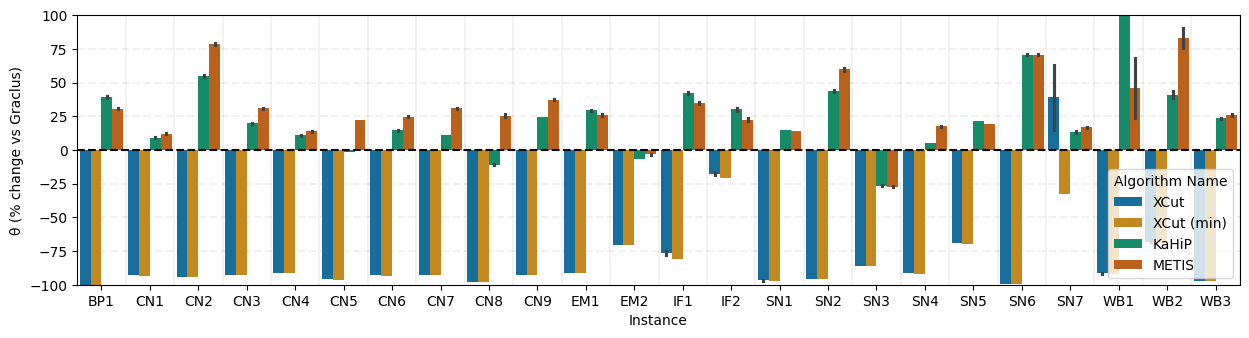

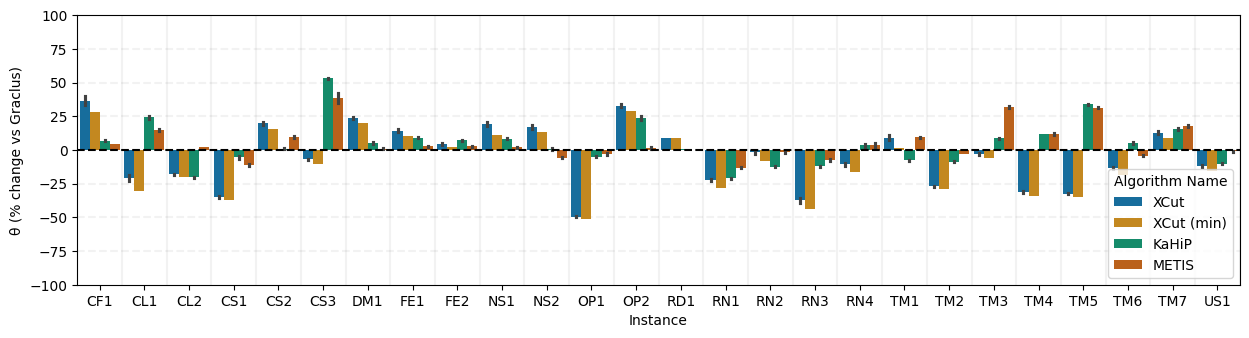

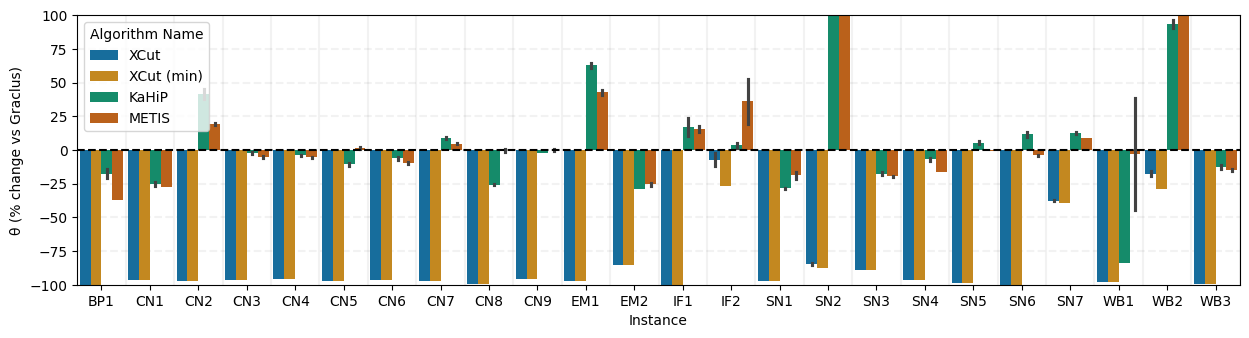

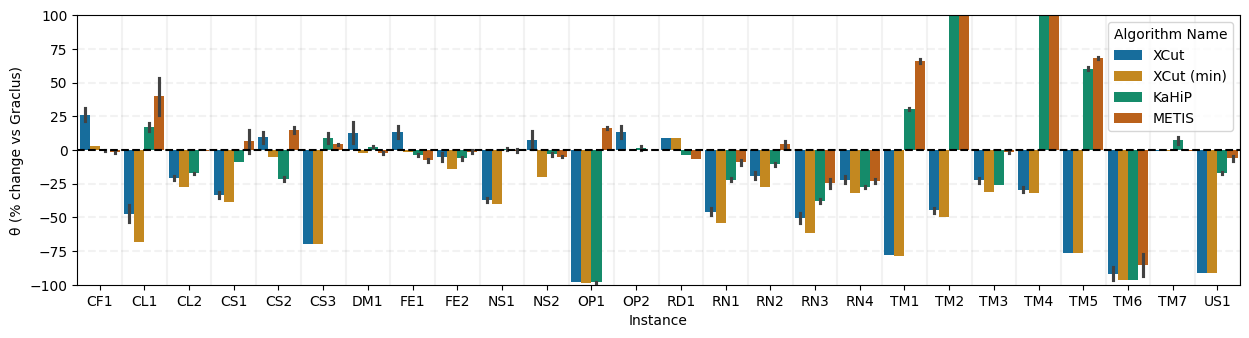

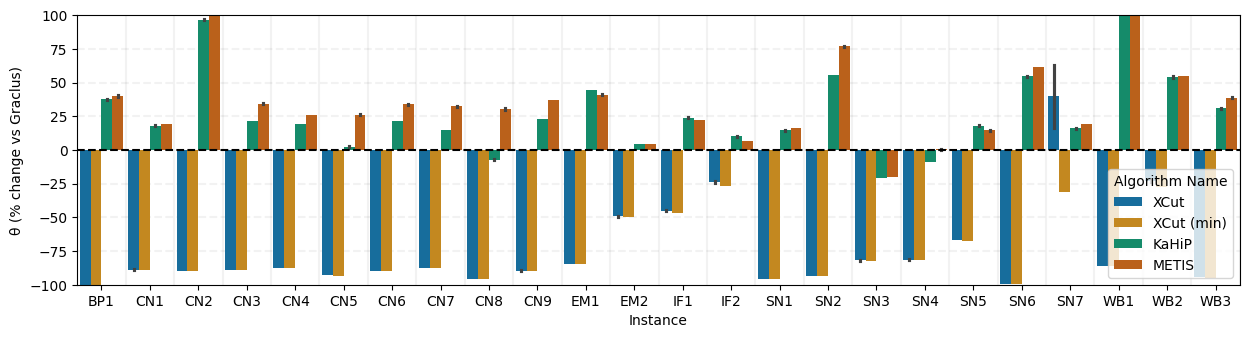

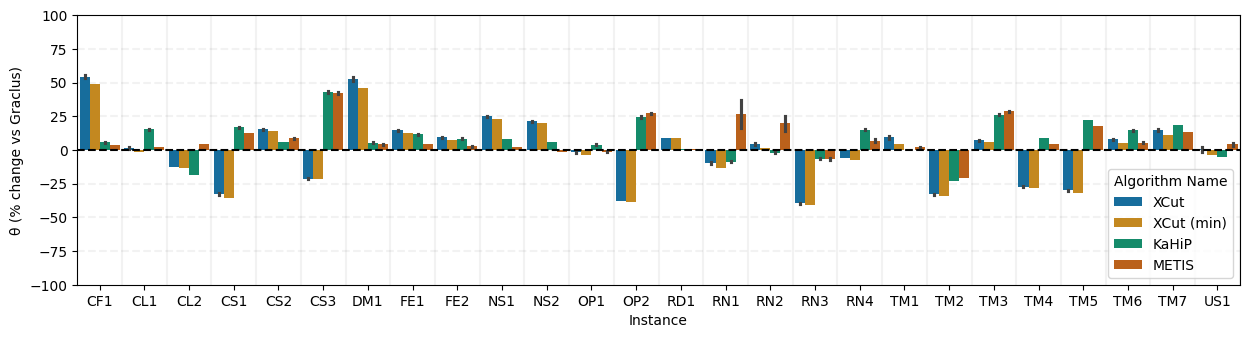

In [669]:
barplot_relative(bdf, 32, good=True)
barplot_relative(bdf, 32, good=False)
barplot_relative(bdf, 2, good=True)
barplot_relative(bdf, 2, good=False)
barplot_relative(bdf, 128, good=True)
barplot_relative(bdf, 128, good=False)

# Plot of GeoMean vs k

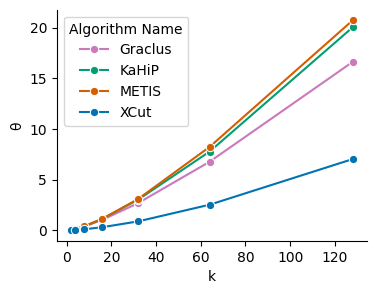

In [681]:
plt.figure(figsize=(4,3))
lineplot = sns.lineplot(
    df[df['Value'] > 0]
    .groupby(['Algorithm Name', 'Parts'])[['Value']]
    .agg(geo_mean_overflow)
    .reset_index(),
    x = 'Parts',
    y = 'Value',
    hue = 'Algorithm Name',
    palette = algo_colors,
    marker='o'
)

sns.despine()
plt.xlabel('k')
plt.ylabel('θ')

lineplot.get_figure().savefig('geomean-total-vs-k.pdf', bbox_inches = 'tight')

# Threshold Experiment

In [696]:
def read_threshold_experiments(filename):
    df_hierarchy = pd.read_csv(filename, 
                 sep = ',', 
                 header = 0, 
                 names = ['Graph Name', 
                          'Experiment Type', 
                          'Phi', 
                          'Potential', 
                          'Parts',
                          'Time (decomp)',
                          'Time (solve)', 
                          'Value (mid)',
                          'Value'], 
                 dtype = {
                     'Graph Name': str,
                     'Experiment Type': int,
                     'Phi': float,
                     'Potential': float,
                     'Parts': int,
                     'Time (decomp)': int,
                     'Time (solve)': int,
                     'Value (mid)': float,
                     'Value': float,
                 },
                )

    

    df_hierarchy['Experiment Type'] = df_hierarchy['Experiment Type'].map(experiment_types)
    df_hierarchy['Time'] = (df_hierarchy['Time (decomp)'] + df_hierarchy['Time (solve)']) / 1000.0
    df_hierarchy['Parts'] = df_hierarchy['Parts'].astype('category')
    df_hierarchy['Potential'] = df_hierarchy['Potential'].astype('category')
    #df_hierarchy['Algorithm Name'] = df_hierarchy['Potential'].astype(str)
    #df_hierarchy['Type'] = df_hierarchy['Graph Name'].map(graph_type)
    df_hierarchy['Graph ID'] = df_hierarchy['Graph Name'].map(instance_keys)

    return df_hierarchy

In [697]:
df_threshold = read_threshold_experiments('./data/potential-experiments-30-jan-final.csv')

In [698]:
df_threshold

Graph Name Experiment Type  Phi     Potential Parts  \
0     vsp_bcsstk30_500sep_10in_1Kout          greedy  0.0  1.000000e+02     2   
1     vsp_bcsstk30_500sep_10in_1Kout          greedy  0.0  1.000000e+02     4   
2     vsp_bcsstk30_500sep_10in_1Kout          greedy  0.0  1.000000e+02     8   
3     vsp_bcsstk30_500sep_10in_1Kout          greedy  0.0  1.000000e+02    16   
4     vsp_bcsstk30_500sep_10in_1Kout          greedy  0.0  1.000000e+02    32   
...                              ...             ...  ...           ...   ...   
1675               coAuthorsCiteseer          greedy  0.0  1.000000e-09     8   
1676               coAuthorsCiteseer          greedy  0.0  1.000000e-09    16   
1677               coAuthorsCiteseer          greedy  0.0  1.000000e-09    32   
1678               coAuthorsCiteseer          greedy  0.0  1.000000e-09    64   
1679               coAuthorsCiteseer          greedy  0.0  1.000000e-09   128   

      Time (decomp)  Time (solve)  Value (mid)      Value   Time Graph ID  
0                45            16     1.000000   0.600001  0.061      TM6  
1                45            30     3.000000   2.856130  0.075      TM6  
2                45            26     7.000000   6.911410  0.071      TM6  
3                45            45    15.000000  14.860000  0.090      TM6  
4                45            30    31.000000  30.885200  0.075      TM6  
...             ...           ...          ...        ...    ...      ...  
1675           2708            85     0.018178   0.018164  2.793      CN7  
1676           2708           127     0.066326   0.066326  2.835      CN7  
1677           2708           240     0.187442   0.180388  2.948      CN7  
1678           2708           507     0.531231   0.521644  3.215      CN7  
1679           2708          1089     1.465890   1.436930  3.797      CN7  

[1680 rows x 11 columns]

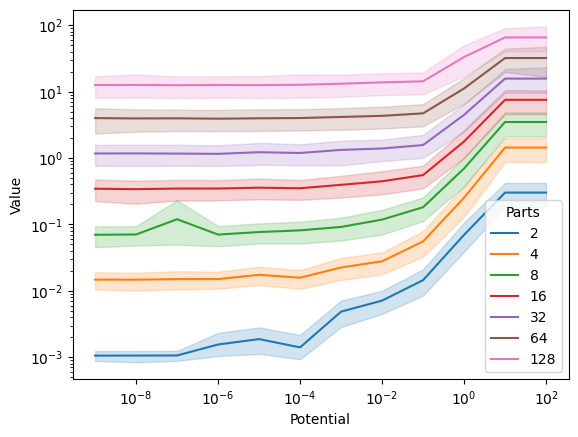

In [609]:
lineplot = sns.lineplot(data=df_threshold[df_threshold['Potential'] <= 1000.0], x='Potential', y='Value', hue='Parts', estimator='mean')
plt.xscale('log')
plt.yscale('log')

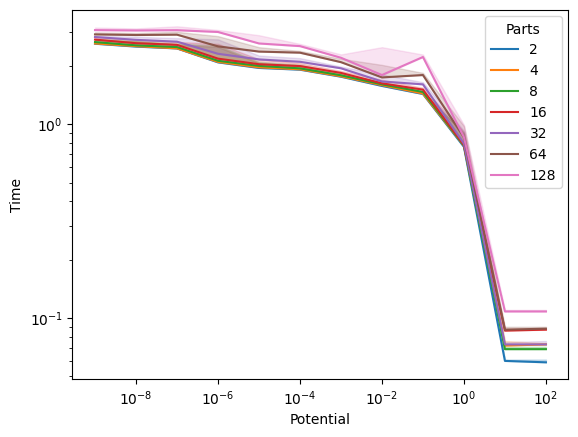

In [610]:
lineplot = sns.lineplot(data=df_threshold, x='Potential', y='Time', hue='Parts', estimator='min')
plt.xscale('log')
plt.yscale('log')

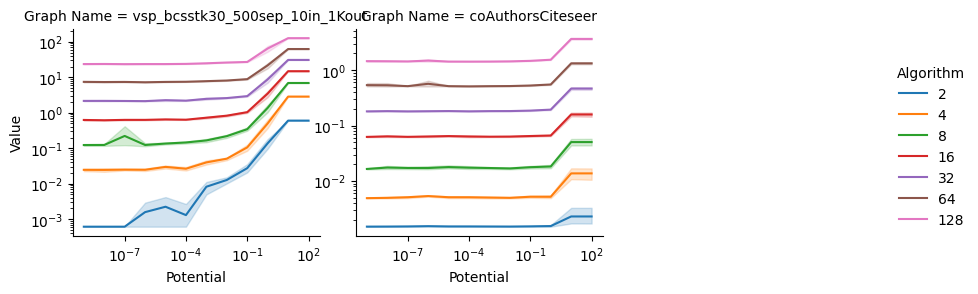

In [611]:
g = sns.FacetGrid(df_threshold, col = 'Graph Name', hue='Parts', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Potential', 'Value')
g.set(xscale='log', yscale='log')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("potential-experiments.pdf") 
g

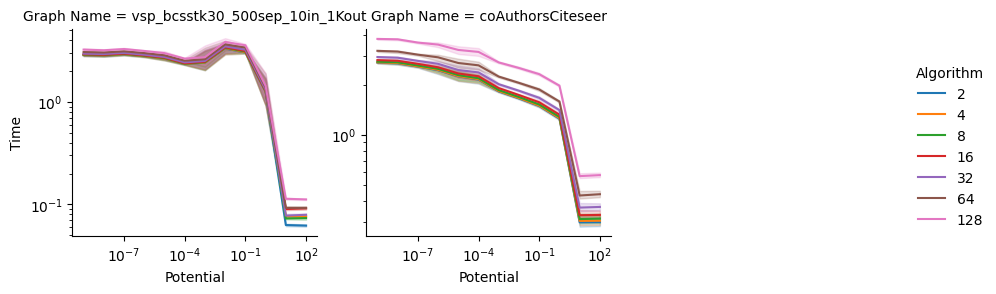

In [655]:
g = sns.FacetGrid(df_threshold, col = 'Graph Name', hue='Parts', sharey = False, sharex = False, col_wrap=3)
g.map(sns.lineplot, 'Potential', 'Time')
g.set(xscale='log', yscale='log')
g.add_legend(title='Algorithm')
fig = g.fig
fig.savefig("potential-experiments-time.pdf") 
g

In [652]:
df_threshold

Graph Name Experiment Type  Phi  Potential Parts  \
0     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     2   
1     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     4   
2     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100     8   
3     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100    16   
4     vsp_bcsstk30_500sep_10in_1Kout          greedy    0        100    32   
...                              ...             ...  ...        ...   ...   
1675               coAuthorsCiteseer          greedy    0      1e-09     8   
1676               coAuthorsCiteseer          greedy    0      1e-09    16   
1677               coAuthorsCiteseer          greedy    0      1e-09    32   
1678               coAuthorsCiteseer          greedy    0      1e-09    64   
1679               coAuthorsCiteseer          greedy    0      1e-09   128   

      Time (decomp)  Time (solve)  Value (mid)     Value  Time  
0                45            16            1  0.600001 0.061  
1                45            30            3   2.85613 0.075  
2                45            26            7   6.91141 0.071  
3                45            45           15     14.86  0.09  
4                45            30           31   30.8852 0.075  
...             ...           ...          ...       ...   ...  
1675           2708            85    0.0181781 0.0181641 2.793  
1676           2708           127    0.0663265 0.0663265 2.835  
1677           2708           240     0.187442  0.180388 2.948  
1678           2708           507     0.531231  0.521644 3.215  
1679           2708          1089      1.46589   1.43693 3.797  

[1680 rows x 10 columns]

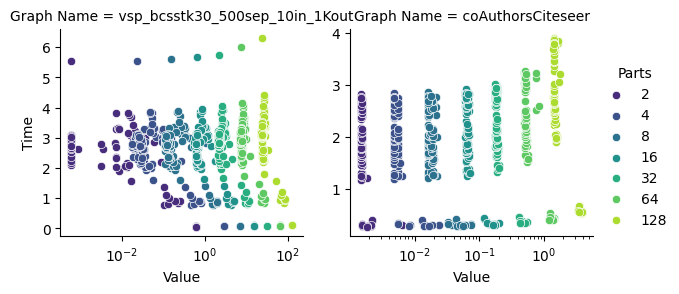

In [678]:
g = sns.FacetGrid(df_threshold, col='Graph Name', hue='Parts', palette='viridis', sharex = False, sharey = False)
g.map(sns.scatterplot, 'Value', 'Time',)# 'Potential')# style='Parts', marker={'2': 'x', '4': 'x', '8': 'x', '16': 'x', '32': 'x', '64': 'x', '128': 'x'})
g.set(xscale='log')
g.add_legend()


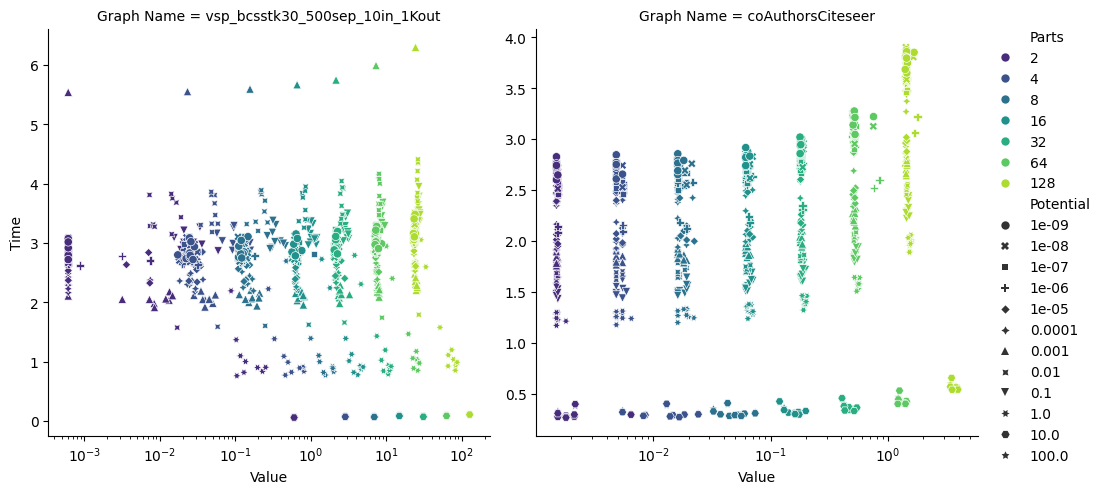

In [858]:
plot = sns.relplot(
    data=df_threshold, 
    x='Value', 
    y='Time', 
    hue='Parts', 
    palette='viridis',
    style='Potential', 
    col='Graph Name', 
    facet_kws={
        'sharex': False, 
        'sharey': False}
)
plot.set(xscale='log')
fig = plot.fig
fig.savefig("potential_pareto.pdf")


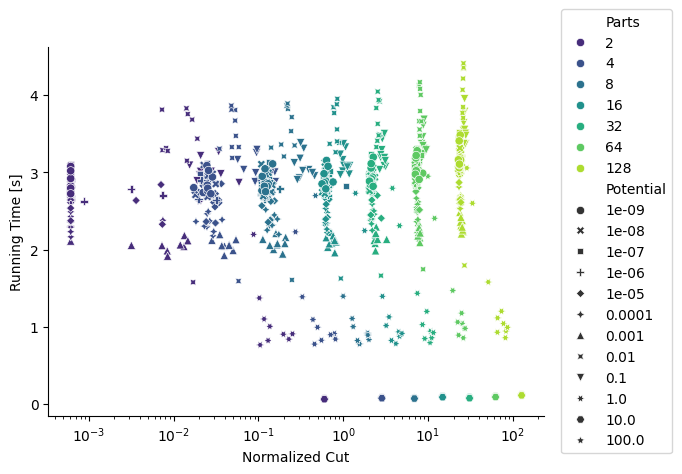

In [715]:
plot = sns.scatterplot(
    data=df_threshold[(df_threshold['Graph Name'] == 'vsp_bcsstk30_500sep_10in_1Kout') & (df_threshold['Time'] < 5)], 
    x='Value', 
    y='Time', 
    hue='Parts', 
    palette='viridis',
    style='Potential', 
)
sns.despine()
plt.xscale('log')
plt.xlabel('Normalized Cut')
plt.ylabel('Running Time [s]')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
fig = plot.get_figure()
fig.savefig("potential_pareto_single.pdf", bbox_inches='tight')

array(['vsp_bcsstk30_500sep_10in_1Kout', 'coAuthorsCiteseer'],
      dtype=object)

In [732]:
df_threshold['ρ'] = df_threshold['Potential']

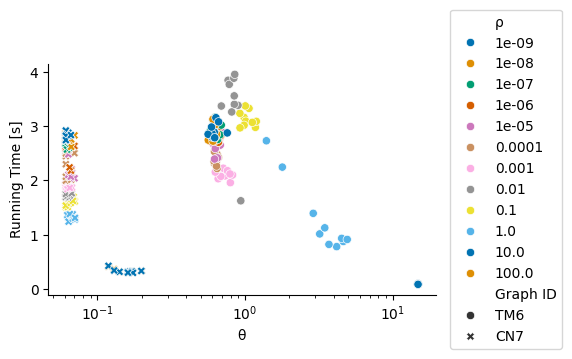

In [734]:
plt.figure(figsize=(5,3))


plot = sns.scatterplot(
    data=df_threshold[(df_threshold['Parts'] == 16) & (df_threshold['Time'] < 5)], 
    x='Value', 
    y='Time', 
    hue='ρ', 
    palette='colorblind',
    style='Graph ID',
)

#plt.figure(figsize=(3,3))


sns.despine()
plt.xscale('log')
plt.xlabel('θ')
plt.ylabel('Running Time [s]')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
#plt.figure(figsize=(1,1))

fig = plot.get_figure()
fig.savefig("potential_pareto_double.pdf", bbox_inches='tight')

# Comparison Table with Zhao et al.

In [1085]:
df_zh = read_hierarchy_experiments('./data/hierarchy-experiments-autotune-zhao-31-jan.csv')

In [1086]:
comparison_table_ours = df_zh.groupby(['Graph Name']).agg({'Value': ['mean', 'min'], 'Time': ['mean', 'min']}).reset_index()
comparison_table_ours.columns = ['Graph Name', 'Cut (mean)', 'Cut (min)', 'Time (mean)', 'Time (min)']

In [1087]:
zhao = { 'Graph Name': ['fe_rotor', 'fe_tooth', 'auto', 'wing_nodal', 'luxembourg_osm', 'mi2010', 'uk', 'smallworld', 'vsp_barth5_1Ksep_50in_5Kout', 'vsp_befref_fxm_2_4_air02', 'vsp_bump2_e18_aa01_model1_crew1', 'vsp_p0291_seymourl_iiasa', 'vsp_model1_crew1_cr42_south31', 'vsp_vibrobox_scagr7-2c_rlfddd', 'vsp_bcsstk30_500sep_10in_1Kout', 'coAuthorsDBLP', 'coAuthorsCiteseer', 'citationCiteseer', 'coPapersDBLP', 'coPapersCiteseer', 'appu'],
           'Cut (Zhao)': [1.50, 1.68, 1.08, 4.71, 0.07, 0.41, 1.05, 7.05, 2.72, 12.83, 13.55, 7.88, 10.48, 6.85, 2.09, 0.49, 0.41, 0.52, 0.14, 0.06, 23.80], 
           'Time (Zhao)': [1.30 + 5.4, 0.94 + 4.0, 14.81 + 29.0, 0.21 + 1.5, 0.86 + 3.8, 2.94 + 10.2, 0.22 + 0.6, 32.20 + 14.1, 0.46 + 2.7, 0.24 + 1.8, 0.91 + 5.4, 0.67 + 1.3, 0.70 + 4.9, 2.65 + 4.8, 2.26 + 25.7, 30.71 + 26.5, 8.20 + 13.3, 32.32 + 24.8, 52.83 + 61.6, 16.41 + 51.6, 25.53 + 2]}
df_zhao = pd.DataFrame(zhao) 

In [1088]:
comparison_table = pd.merge(comparison_table_ours, df_zhao, on='Graph Name')

In [1089]:
print(
    comparison_table.to_latex(
        float_format='%.2f', 
        index=False, 
        caption="Cut values and running time of our Algorithm vs the values reported by Zhao et al.", 
        label='tab:zhao')
)


\begin{table}
\caption{Cut values and running time of our Algorithm vs the values reported by Zhao et al.}
\label{tab:zhao}
\begin{tabular}{lrrrrrr}
\toprule
Graph Name & Cut (mean) & Cut (min) & Time (mean) & Time (min) & Cut (Zhao) & Time (Zhao) \\
\midrule
appu & 28.98 & 28.98 & 0.14 & 0.13 & 23.80 & 27.53 \\
auto & 1.45 & 1.39 & 35.50 & 34.56 & 1.08 & 43.81 \\
citationCiteseer & 0.31 & 0.29 & 14.38 & 13.06 & 0.52 & 57.12 \\
coAuthorsCiteseer & 0.17 & 0.16 & 3.12 & 3.05 & 0.41 & 21.50 \\
coAuthorsDBLP & 0.27 & 0.27 & 5.83 & 5.50 & 0.49 & 57.21 \\
coPapersCiteseer & 0.04 & 0.04 & 29.27 & 27.36 & 0.06 & 68.01 \\
coPapersDBLP & 0.13 & 0.13 & 49.49 & 43.78 & 0.14 & 114.43 \\
fe_rotor & 1.58 & 1.55 & 2.75 & 2.66 & 1.50 & 6.70 \\
fe_tooth & 2.06 & 1.96 & 1.59 & 1.53 & 1.68 & 4.94 \\
luxembourg_osm & 0.06 & 0.06 & 0.47 & 0.46 & 0.07 & 4.66 \\
mi2010 & 0.17 & 0.16 & 3.13 & 3.08 & 0.41 & 13.14 \\
smallworld & 6.00 & 5.87 & 4.41 & 4.22 & 7.05 & 46.30 \\
uk & 0.87 & 0.77 & 0.02 & 0.02 & 1.05 &

In [601]:
comparison_table_reorder = comparison_table[['Graph Name', 'Cut (mean)', 'Cut (min)', 'Cut (Zhao)', 'Time (mean)', 'Time (min)', 'Time (Zhao)']]
print(
    comparison_table_reorder.to_latex(
        float_format='%.2f', 
        index=False, 
        caption="Cut values and running time of our Algorithm vs the values reported by Zhao et al.", 
        label='tab:zhao')
)


\begin{table}
\caption{Cut values and running time of our Algorithm vs the values reported by Zhao et al.}
\label{tab:zhao}
\begin{tabular}{lrrrrrr}
\toprule
Graph Name & Cut (mean) & Cut (min) & Cut (Zhao) & Time (mean) & Time (min) & Time (Zhao) \\
\midrule
appu & 28.98 & 28.98 & 23.80 & 0.14 & 0.13 & 27.53 \\
auto & 1.45 & 1.39 & 1.08 & 35.50 & 34.56 & 43.81 \\
citationCiteseer & 0.31 & 0.29 & 0.52 & 14.38 & 13.06 & 57.12 \\
coAuthorsCiteseer & 0.17 & 0.16 & 0.41 & 3.12 & 3.05 & 21.50 \\
coAuthorsDBLP & 0.27 & 0.27 & 0.49 & 5.83 & 5.50 & 57.21 \\
coPapersCiteseer & 0.04 & 0.04 & 0.06 & 29.27 & 27.36 & 68.01 \\
coPapersDBLP & 0.13 & 0.13 & 0.14 & 49.49 & 43.78 & 114.43 \\
fe_rotor & 1.58 & 1.55 & 1.50 & 2.75 & 2.66 & 6.70 \\
fe_tooth & 2.06 & 1.96 & 1.68 & 1.59 & 1.53 & 4.94 \\
luxembourg_osm & 0.06 & 0.06 & 0.07 & 0.47 & 0.46 & 4.66 \\
mi2010 & 0.17 & 0.16 & 0.41 & 3.13 & 3.08 & 13.14 \\
smallworld & 6.00 & 5.87 & 7.05 & 4.41 & 4.22 & 46.30 \\
uk & 0.87 & 0.77 & 1.05 & 0.02 & 0.02 &

In [1097]:
(gmean1(comparison_table['Cut (min)']), gmean1(comparison_table['Cut (mean)']), gmean1(comparison_table['Cut (Zhao)']))

(1.392609000859661, 1.456211925698826, 1.6383255436358166)

In [223]:
xdf = pd.read_csv(
    './experiment/comparison-experiments.csv', 
    sep=',',
    header=0,
    names = [
        'Graph Name',
        'Experiment Type',
        'Value',
    ],
    dtype = {
        'Graph Name': str,
        'Experiment Type': str,
        'Value': float,
    }
)

geo_mean_overflow(xdf[xdf['Experiment Type'] == 'graclus'].drop_duplicates()['Value'])

3.064265752611074

# Stacked bar plot for running time

In [568]:
# select the data
df_time = df[df['Experiment Type'] == 'greedy'][['Graph ID', 'Parts', 'Time', 'Time (decomp)']]

graph_subset = ['EM2', 'FE1', 'CN8', 'WB3', 'SN5']

df_time = df_time[df_time['Graph ID'].isin(graph_subset)]

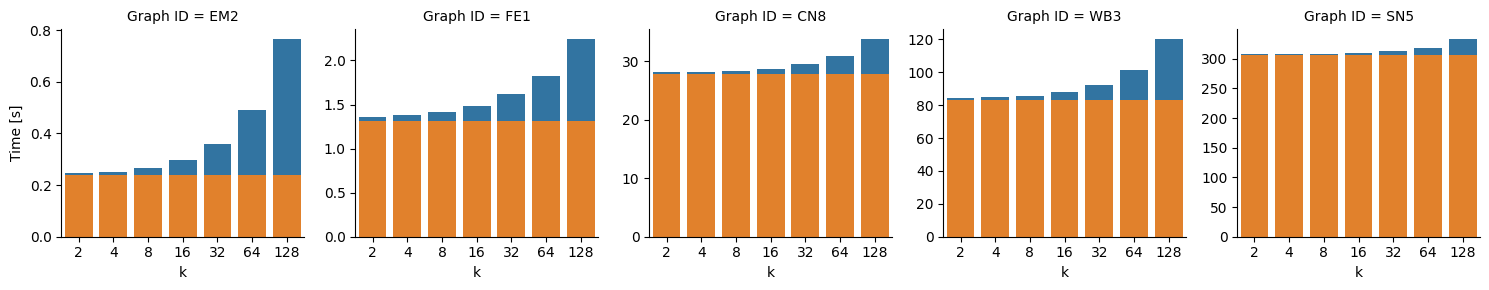

In [570]:
df_melted = pd.melt(df_time, id_vars=['Graph ID', 'Parts'], value_vars=['Time', 'Time (decomp)'], var_name='Time')

g = sns.FacetGrid(df_melted, col='Graph ID', col_wrap=5, hue='Time', col_order=['EM2', 'FE1', 'CN8', 'WB3', 'SN5'], sharey=False)
g.map_dataframe(sns.barplot, x='Parts', y='value', errorbar=None)
g.set_axis_labels('k', 'Time [s]')


g.fig.savefig("stacked-bar-time.pdf")

In [500]:
df

Graph Name Experiment Type  Phi  Potential  Parts  \
10490               imdb           metis  NaN        NaN      2   
10505               imdb           metis  NaN        NaN      4   
10504               imdb           metis  NaN        NaN      4   
10503               imdb         graclus  NaN        NaN      2   
10502               imdb           kahip  NaN        NaN      2   
...                  ...             ...  ...        ...    ...   
9166   web-wikipedia2009           metis  NaN        NaN      2   
9167   web-wikipedia2009           metis  NaN        NaN      2   
9168   web-wikipedia2009           metis  NaN        NaN      2   
1839   web-wikipedia2009          greedy  0.0     0.0001      2   
9305   web-wikipedia2009           kahip  NaN        NaN    128   

       Time (decomp)  Time (solve)  Value (mid)      Value      Time  \
10490            NaN           NaN          NaN   0.028530   3.69030   
10505            NaN           NaN          NaN   0.171621   4.06318   
10504            NaN           NaN          NaN   0.168228   4.11926   
10503            NaN           NaN          NaN   0.045732   8.68729   
10502            NaN           NaN          NaN   0.037541   5.59666   
...              ...           ...          ...        ...       ...   
9166             NaN           NaN          NaN   0.061646   3.79458   
9167             NaN           NaN          NaN   0.061454   3.76291   
9168             NaN           NaN          NaN   0.064755   3.76218   
1839          83.976         0.842     0.000467   0.000467  84.81800   
9305             NaN           NaN          NaN  20.824300  16.15970   

      Algorithm Name       Type Type (short) Graph Number  Relative (Graclus)  
10490          METIS  Bipartite           BP          BP1            0.623840  
10505          METIS  Bipartite           BP          BP1            0.982044  
10504          METIS  Bipartite           BP          BP1            0.962629  
10503        Graclus  Bipartite           BP          BP1            1.000000  
10502          KaHiP  Bipartite           BP          BP1            0.820895  
...              ...        ...          ...          ...                 ...  
9166           METIS  Web Graph           WB          WB3            0.834760  
9167           METIS  Web Graph           WB          WB3            0.832160  
9168           METIS  Web Graph           WB          WB3            0.876864  
1839            XCut  Web Graph           WB          WB3            0.006328  
9305           KaHiP  Web Graph           WB          WB3            1.318277  

[10777 rows x 15 columns]

# Graph Statistics

In [350]:
df_stats = pd.read_csv('graph-statistics.csv')

df_stats = df_stats[df_stats['Graph Name'].isin(graph_names)]
df_stats['Type'] = df_stats['Graph Name'].map(graph_type)
df_stats['Graph Number'] = df_stats['Graph Name'].map(instance_keys)

df_stats = df_stats[['Graph Number', 'Graph Name', 'Type', 'Vertices', 'Edges', 'Max Degree', 'Avg Degree', '25th', '50th', '75th', '90th', 'STD']]

df_stats.sort_values('Graph Number', inplace=True)
df_stats.reset_index(drop=True, inplace=True)

In [351]:
df_stats

Graph Number                       Graph Name                     Type  \
0           BP1                             imdb                Bipartite   
1           CF1                         ramage02     Computational Fluids   
2           CL1                               uk               Clustering   
3           CL2                       smallworld               Clustering   
4           CN1                 citationCiteseer         Citation Network   
5           CN2                ca-hollywood-2009         Citation Network   
6           CN3                    coAuthorsDBLP         Citation Network   
7           CN4                    ca-MathSciNet         Citation Network   
8           CN5                ca-coauthors-dblp         Citation Network   
9           CN6                     ca-dblp-2012         Citation Network   
10          CN7                      ca-citeseer         Citation Network   
11          CN8                 coPapersCiteseer         Citation Network   
12          CN9                     ca-dblp-2010         Citation Network   
13          CS1                            add32       Circuit Simulation   
14          CS2                          rajat10       Circuit Simulation   
15          CS3                          memplus       Circuit Simulation   
16          DM1                        pcrystk02      Duplicate Materials   
17          EM1                email-enron-large            Email Network   
18          EM2                         email-EU            Email Network   
19          FE1                         fe_tooth          Finite Elements   
20          FE2                         fe_rotor          Finite Elements   
21          IF1                  inf-openflights   Infrastructure Network   
22          IF2                        inf-power   Infrastructure Network   
23          NS1                       wing_nodal     Numerical Simulation   
24          NS2                             auto     Numerical Simulation   
25          OP1                           gupta2             Optimization   
26          OP2                       finance256             Optimization   
27          RD1                             appu             Random Graph   
28          RN1                   inf-roadNet-CA             Road Network   
29          RN2                   inf-roadNet-PA             Road Network   
30          RN3                    inf-italy-osm             Road Network   
31          RN4                   luxembourg_osm             Road Network   
32          SN1                 soc-youtube-snap           Social Network   
33          SN2                       soc-flickr           Social Network   
34          SN3                       soc-lastfm           Social Network   
35          SN4              soc-twitter-follows           Social Network   
36          SN5                        soc-pokec           Social Network   
37          SN6                  soc-livejournal           Social Network   
38          SN7                   soc-FourSquare           Social Network   
39          TM1    vsp_vibrobox_scagr7-2c_rlfddd         Triangle Mixture   
40          TM2  vsp_bump2_e18_aa01_model1_crew1         Triangle Mixture   
41          TM3      vsp_barth5_1Ksep_50in_5Kout         Triangle Mixture   
42          TM4    vsp_model1_crew1_cr42_south31         Triangle Mixture   
43          TM5         vsp_p0291_seymourl_iiasa         Triangle Mixture   
44          TM6   vsp_bcsstk30_500sep_10in_1Kout         Triangle Mixture   
45          TM7         vsp_befref_fxm_2_4_air02         Triangle Mixture   
46          US1                           mi2010  US Census Redistricting   
47          WB1                      web-it-2004                Web Graph   
48          WB2                       web-google                Web Graph   
49          WB3                web-wikipedia2009                Web Graph   

    Vertices     Edges  Max Degree  Avg Degree  25th  50th  75th  90th  \
0

In [352]:
print(
    df_stats.to_latex(
        index=False, 
        float_format='%.2f',
        caption='Statistics on the number of vertices, edges and degree distribution of the graph instances in our benchmark dataset. The last four columns are percentile values for the degrees.',
        label='tab:instances',
        escape=True
    )
)

\begin{table}
\caption{Statistics on the number of vertices, edges and degree distribution of the graph instances in our benchmark dataset. The last four columns are percentile values for the degrees.}
\label{tab:instances}
\begin{tabular}{lllrrrrrrrrr}
\toprule
Graph Number & Graph Name & Type & Vertices & Edges & Max Degree & Avg Degree & 25th & 50th & 75th & 90th & STD \\
\midrule
BP1 & imdb & Bipartite & 1403278 & 4303383 & 1652 & 6.13 & 1 & 2 & 6 & 15 & 13.99 \\
CF1 & ramage02 & Computational Fluids & 16830 & 1424761 & 269 & 169.31 & 131 & 170 & 170 & 269 & 52.86 \\
CL1 & uk & Clustering & 4824 & 6837 & 3 & 2.83 & 3 & 3 & 3 & 3 & 0.41 \\
CL2 & smallworld & Clustering & 100000 & 499998 & 17 & 10.00 & 9 & 10 & 11 & 12 & 1.34 \\
CN1 & citationCiteseer & Citation Network & 268495 & 1156647 & 1318 & 8.62 & 2 & 5 & 10 & 18 & 16.28 \\
CN2 & ca-hollywood-2009 & Citation Network & 1069126 & 56306653 & 11467 & 105.33 & 13 & 31 & 75 & 212 & 279.53 \\
CN3 & coAuthorsDBLP & Citation Network & 

# Comparison with dynamic

In [741]:
df_dynamic = read_experiments(None, 'data/hierarchy-experiments-autotune-dp-1-feb.csv')
#df_dynamic = read_experiments(None, 'data/hierarchy-experiments-dp-potential.csv')

dp_graphs = set(df_dynamic['Graph Name'])
df_dynamic = pd.concat([df_dynamic, df[df['Experiment Type'] == 'greedy']])
df_dynamic = df_dynamic[df_dynamic['Graph Name'].isin(dp_graphs)]
df_dynamic.reset_index(inplace=True)

df_dynamic

index Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
0       771         uk              DP  0.0     0.0001      8          0.012   
1       808         uk              DP  0.0     0.0001     64          0.011   
2       809         uk              DP  0.0     0.0001    128          0.011   
3       810         uk              DP  0.0     0.0001      2          0.011   
4       811         uk              DP  0.0     0.0001      4          0.011   
...     ...        ...             ...  ...        ...    ...            ...   
2653   2925     mi2010          greedy  0.0     0.0001      8          2.180   
2654   2892     mi2010          greedy  0.0     0.0001      8          2.161   
2655   2891     mi2010          greedy  0.0     0.0001      4          2.161   
2656   2890     mi2010          greedy  0.0     0.0001      2          2.160   
2657   2893     mi2010          greedy  0.0     0.0001     16          2.161   

      Time (solve)  Value (mid)      Value   Time Algorithm Name  \
0            0.012     0.091079   0.078788  0.024           XCut   
1            0.182     4.571950   4.017190  0.193           XCut   
2            0.549    15.471400  13.790900  0.560           XCut   
3            0.003     0.003822   0.002627  0.014           XCut   
4            0.006     0.017555   0.016108  0.017           XCut   
...            ...          ...        ...    ...            ...   
2653         0.353     0.021214   0.014574  2.533           XCut   
2654         0.332     0.023876   0.017911  2.493           XCut   
2655         0.223     0.004837   0.002839  2.384           XCut   
2656         0.101     0.000137   0.000104  2.261           XCut   
2657         0.591     0.076049   0.055895  2.752           XCut   

                         Type Type (short) Graph ID  Relative (Graclus)  
0                  Clustering           CL      CL1                 NaN  
1                  Clustering           CL      CL1                 NaN  
2                  Clustering           CL      CL1                 NaN  
3                  Clustering           CL      CL1                 NaN  
4                  Clustering           CL      CL1                 NaN  
...                       ...          ...      ...                 ...  
2653  US Census Redistricting           US      US1            0.704900  
2654  US Census Redistricting           US      US1            0.866287  
2655  US Census Redistricting           US      US1            0.510955  
2656  US Census Redistricting           US      US1            0.085543  
2657  US Census Redistricting           US      US1            0.800697  

[2658 rows x 16 columns]

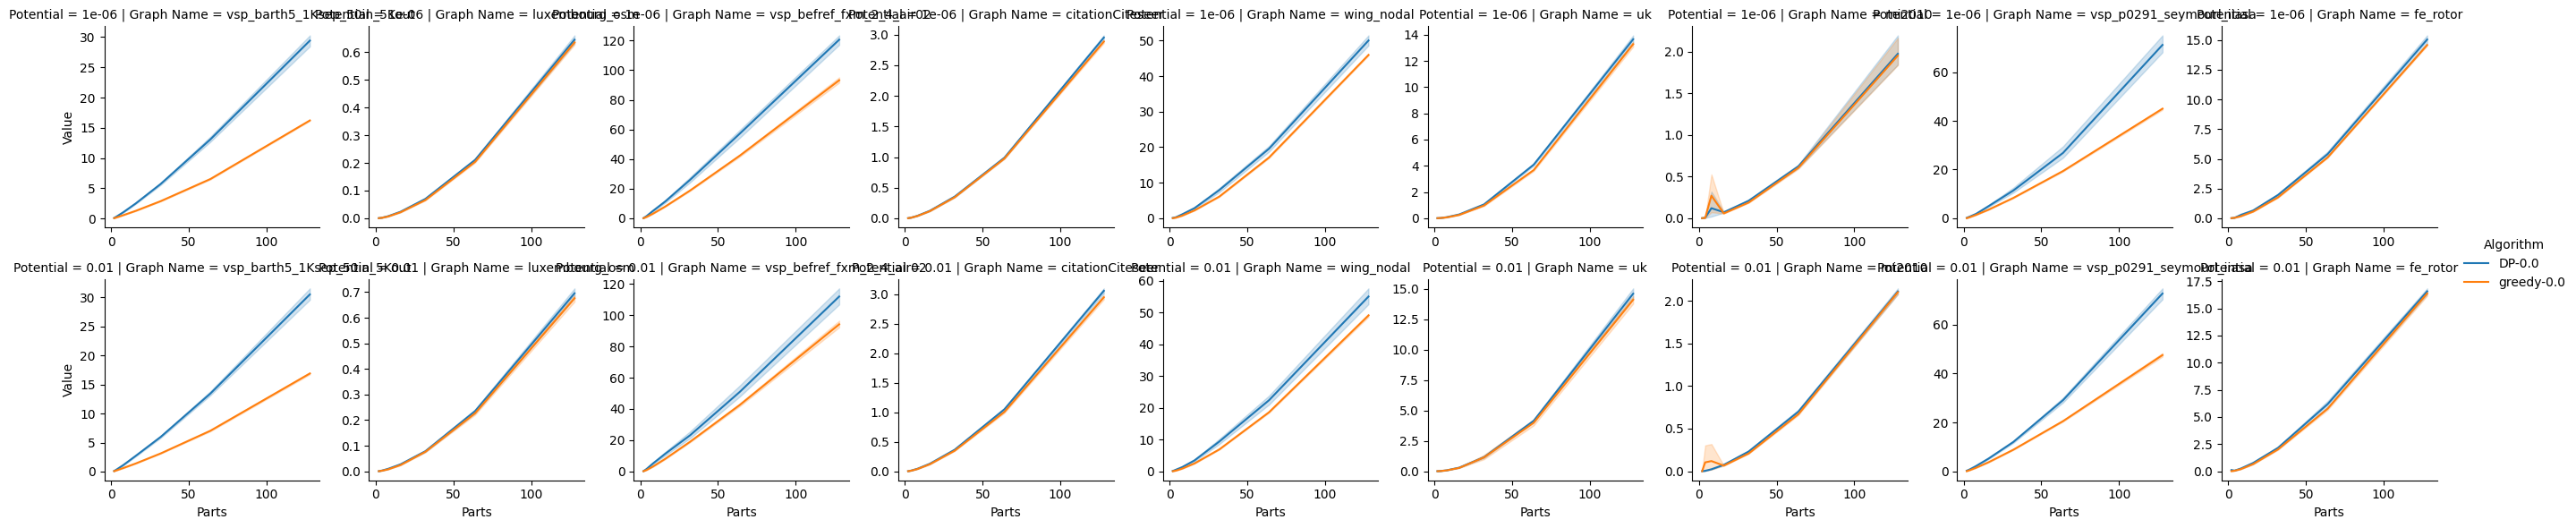

In [65]:
g = sns.FacetGrid(df_dynamic, row = 'Potential', col = 'Graph Name', hue='Algorithm Name', sharey = False, sharex = False)
g.map(sns.lineplot, 'Parts', 'Value')
g.add_legend(title='Algorithm')
fig = g.fig
# fig.savefig("graclus-quality.pdf") 
g

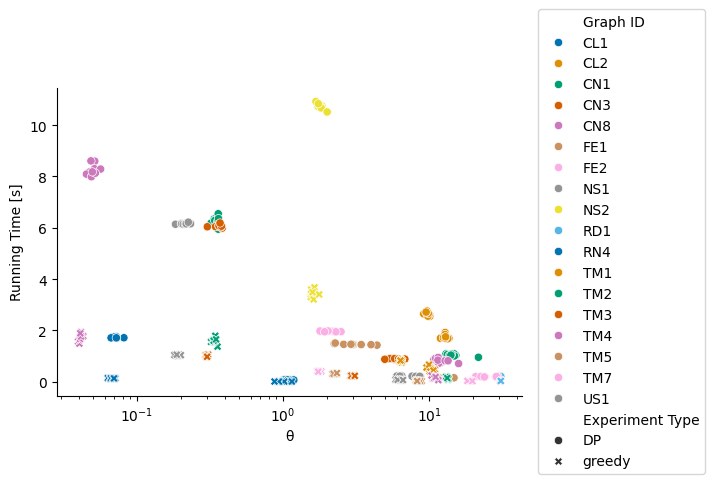

In [742]:
plt.figure(figsize=(6,4))

plot = sns.scatterplot(
    data=df_dynamic[(df_dynamic['Parts'] == 32) & (df_dynamic['Graph Name'] != 'vsp_bcsstk30_500sep_10in_1Kout')], 
    x='Value', 
    y='Time (solve)', 
    hue='Graph ID', 
    palette='colorblind',
    style='Experiment Type',
)

sns.despine()
plt.xscale('log')
plt.xlabel('θ')
plt.ylabel('Running Time [s]')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
fig = plot.get_figure()
fig.savefig("dp-comparison.pdf", bbox_inches='tight')

In [1113]:
df_dynamic

Graph Name Experiment Type  Phi  Potential  Parts  \
0     vsp_barth5_1Ksep_50in_5Kout              DP    0     0.0001      2   
1     vsp_barth5_1Ksep_50in_5Kout              DP    0     0.0001      4   
2     vsp_barth5_1Ksep_50in_5Kout              DP    0     0.0001      8   
3     vsp_barth5_1Ksep_50in_5Kout              DP    0     0.0001     16   
4     vsp_barth5_1Ksep_50in_5Kout              DP    0     0.0001     32   
...                           ...             ...  ...        ...    ...   
3422              inf-openflights          greedy    0     0.0001      2   
3423              inf-openflights          greedy    0     0.0001      4   
3424              inf-openflights          greedy    0     0.0001     32   
3425              inf-openflights          greedy    0     0.0001     64   
3426              inf-openflights          greedy    0     0.0001    128   

      Time (decomp)  Time (solve)  Value (mid)     Value  Time Algorithm Name  \
0             0.506         0.067     0.311176 0.0915189 0.573         DP-0.0   
1             0.506         0.089     0.768921   0.54056 0.595         DP-0.0   
2             0.506         0.164       1.7752   1.01206  0.67         DP-0.0   
3             0.506         0.368      4.05466   2.38913 0.874         DP-0.0   
4             0.506         0.905      9.32218   5.42098 1.411         DP-0.0   
...             ...           ...          ...       ...   ...            ...   
3422          0.036             0            0         0 0.036     greedy-0.0   
3423          0.036         0.001            0         0 0.037     greedy-0.0   
3424          0.036         0.021      2.01005   2.86028 0.057     greedy-0.0   
3425          0.036         0.039      9.21134   8.80244 0.075     greedy-0.0   
3426          0.036         0.067       31.544   32.6508 0.103     greedy-0.0   

                        Type  Graph Number  
0           Triangle Mixture            41  
1           Triangle Mixture            41  
2           Triangle Mixture            41  
3           Triangle Mixture            41  
4           Triangle Mixture            41  
...                      ...           ...  
3422  Infrastructure Network            21  
3423  Infrastructure Network            21  
3424  Infrastructure Network            21  
3425  Infrastructure Network            21  
3426  Infrastructure Network            21  

[4755 rows x 13 columns]

# Discovering Patterns?

In [737]:
def skewness(graph):
    chosenrows = df_stats[df_stats['Graph Name'] == graph]

    if len(chosenrows) != 1:
        return -0.0/0.0

    #print(chosenrows)
    
    for (_, row) in chosenrows.iterrows():
        #return (row['Avg Degree'] - row['50th']) / row['STD']
        return row['Max Degree'] / row['50th']
        #return row['Avg Degree'] / row['50th']
        #return row['Max Degree'] / row['Avg Degree']



min_df['Skewness'] = min_df['Graph Name'].map(skewness)

synthetic = ['smallworld', 'appu']

# remove the synthetic instances
min_df = min_df[ ~(min_df['Graph Name'].isin(synthetic)) & (min_df['Type (short)'] != 'TM')]

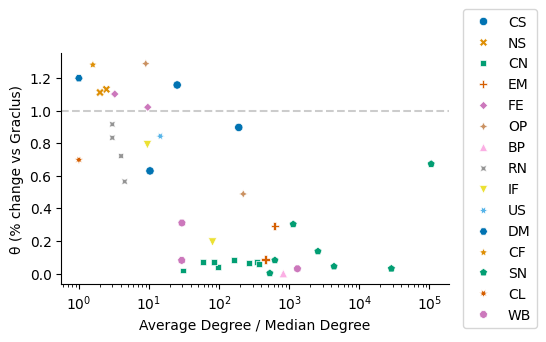

In [738]:
plt.figure(figsize=(5,3))

g =sns.scatterplot(
    min_df[min_df['Parts'] == 32],
    x = 'Skewness',
    y = 'Relative (Graclus)',
    style = 'Type (short)',
    hue = 'Type (short)',
    palette = 'colorblind',
)
#g.set_xlim(0.5, 5.5)

sns.despine()

plt.xscale('log')
plt.xlabel('Average Degree / Median Degree')
plt.ylabel('θ (% change vs Graclus)')

g.axhline(1.0, color='black', linestyle='--', alpha = 0.2)


#plt.yscale('log')
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')
g.get_figure().savefig('max-median-relative.pdf', bbox_inches = 'tight')

In [355]:
min_df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
0         add32          greedy  0.0     0.0001      2          0.010   
1         add32          greedy  0.0     0.0001      4          0.010   
2         add32          greedy  0.0     0.0001      8          0.010   
3         add32          greedy  0.0     0.0001     16          0.010   
4         add32          greedy  0.0     0.0001     32          0.010   
..          ...             ...  ...        ...    ...            ...   
345  wing_nodal          greedy  0.0     0.0001      8          0.227   
346  wing_nodal          greedy  0.0     0.0001     16          0.221   
347  wing_nodal          greedy  0.0     0.0001     32          0.238   
348  wing_nodal          greedy  0.0     0.0001     64          0.227   
349  wing_nodal          greedy  0.0     0.0001    128          0.226   

     Time (solve)  Value (mid)      Value   Time Algorithm Name  \
0           0.001     0.001419   0.001419  0.011     XCut (min)   
1           0.001     0.013108   0.011606  0.011     XCut (min)   
2           0.002     0.057552   0.048827  0.012     XCut (min)   
3           0.003     0.203367   0.192537  0.013     XCut (min)   
4           0.008     0.556008   0.512452  0.018     XCut (min)   
..            ...          ...        ...    ...            ...   
345         0.030     0.936251   0.647438  0.257     XCut (min)   
346         0.042     2.849900   2.202780  0.263     XCut (min)   
347         0.081     7.412610   5.895560  0.319     XCut (min)   
348         0.121    19.880900  16.635800  0.348     XCut (min)   
349         0.182    50.665300  45.272000  0.408     XCut (min)   

                     Type Type (short) Graph Number  Relative (Graclus)  \
0      Circuit Simulation           CS          CS1            0.610252   
1      Circuit Simulation           CS          CS1            0.868960   
2      Circuit Simulation           CS          CS1            0.828634   
3      Circuit Simulation           CS          CS1            0.892342   
4      Circuit Simulation           CS          CS1            0.629782   
..                    ...          ...          ...                 ...   
345  Numerical Simulation           NS          NS1            1.072740   
346  Numerical Simulation           NS          NS1            1.121379   
347  Numerical Simulation           NS          NS1            1.110620   
348  Numerical Simulation           NS          NS1            1.180070   
349  Numerical Simulation           NS          NS1            1.227116   

     Skewness  
0    0.222620  
1    0.222620  
2    0.222620  
3    0.222620  
4    0.222620  
..        ...  
345 -0.069896  
346 -0.069896  
347 -0.069896  
348 -0.069896  
349 -0.069896  

[350 rows x 16 columns]

# Running Time

In [579]:
df = read_experiments('data/comparison-runtime.csv', 'data/final-runtime.csv')

graclus_sum = df[df['Algorithm Name'] == 'Graclus'].groupby(['Graph Name', 'Parts'])['Time'].mean().sum()
metis_sum = df[df['Algorithm Name'] == 'METIS'].groupby(['Graph Name', 'Parts'])['Time'].mean().sum()
kahip_sum = df[df['Algorithm Name'] == 'KaHiP'].groupby(['Graph Name', 'Parts'])['Time'].mean().sum()
xcut_sum = df[df['Algorithm Name'] == 'XCut'].groupby(['Graph Name', 'Parts'])['Time'].mean().sum()

#Counter(df[df['Algorithm Name'] == 'XCut']['Graph Name'])

print(xcut_sum / graclus_sum)
print(xcut_sum / metis_sum)
print(xcut_sum / kahip_sum)

3.0388790409764233
20.759860529820077
6.742256666609106


In [582]:
xcut_solve_sum = df[df['Algorithm Name'] == 'XCut'].groupby(['Graph Name', 'Parts'])['Time (solve)'].mean().sum()

print(xcut_sum)
print(xcut_solve_sum)

16343.235722222224
786.1228333333333


In [595]:
# each sparsifier is counted seven times
xcut_decomp_single = df[df['Algorithm Name'] == 'XCut'].groupby(['Graph Name'])['Time (decomp)'].mean().sum()

xcut_data_analysis_time = xcut_decomp_single + xcut_solve_sum

print(xcut_data_analysis_time / graclus_sum)
print(xcut_data_analysis_time / metis_sum)
print(xcut_data_analysis_time / kahip_sum)

0.5594163218947954
3.821608120640885
1.2411578002437487


In [588]:
df

Graph Name Experiment Type  Phi  Potential  Parts  Time (decomp)  \
425                imdb          greedy  0.0     0.0001     64         65.690   
467                imdb          greedy  0.0     0.0001     64         58.166   
465                imdb          greedy  0.0     0.0001     16         58.166   
464                imdb          greedy  0.0     0.0001      8         58.166   
463                imdb          greedy  0.0     0.0001      4         58.166   
...                 ...             ...  ...        ...    ...            ...   
1819  web-wikipedia2009          greedy  0.0     0.0001    128         80.866   
1818  web-wikipedia2009          greedy  0.0     0.0001     64         80.866   
1817  web-wikipedia2009          greedy  0.0     0.0001     32         80.866   
1833  web-wikipedia2009          greedy  0.0     0.0001    128         82.676   
5020  web-wikipedia2009         graclus  NaN        NaN     32            NaN   

      Time (solve)  Value (mid)     Value      Time Algorithm Name       Type  \
425         12.336     0.000000  0.000000   78.0260           XCut  Bipartite   
467         10.214     0.000000  0.000000   68.3800           XCut  Bipartite   
465          2.428     0.000000  0.000000   60.5940           XCut  Bipartite   
464          1.189     0.000000  0.000000   59.3550           XCut  Bipartite   
463          0.678     0.000000  0.000000   58.8440           XCut  Bipartite   
...            ...          ...       ...       ...            ...        ...   
1819        36.011     0.863039  0.852654  116.8770           XCut  Web Graph   
1818        17.398     0.292668  0.292660   98.2640           XCut  Web Graph   
1817         8.762     0.095683  0.095682   89.6280           XCut  Web Graph   
1833        37.211     0.883392  0.859703  119.8870           XCut  Web Graph   
5020           NaN          NaN  3.184630   16.9602        Graclus  Web Graph   

     Type (short) Graph ID  
425            BP      BP1  
467            BP      BP1  
465            BP      BP1  
464            BP      BP1  
463            BP      BP1  
...           ...      ...  
1819           WB      WB3  
1818           WB      WB3  
1817           WB      WB3  
1833           WB      WB3  
5020           WB      WB3  

[5761 rows x 14 columns]